#1 - Introduction

> The introductory chapter should be filled with identity, the query you have made on Google Cloud Platform!, and the objective to be achieved.

Name : Hillidatul Ilmi

Batch : FTDS-012

Dataset : credit_card_default from Bigquery Public Data

Objective : Predict default_payment_next_month or next month's default payment. As a Data Science, I will conduct an analysis of the relationship between the default payment variable (target/y) which is a categorical type of data to one or more variables (feature/X) in the form of factors that affect the default payment. I will predict the default payment classification of 1 = yes and 0 = no, from several features that can support.
In this analysis approach, the target variable is limited or categorical, in the form of A or B (binary). Based on this, I will analyze the income group with two methods, namely Logistic Regression, SVM, Decision Tree, Random Forest, KNN, Naive Bayes AdaBoosting.

The dataset can be retrieved via bigquery, using the ml_datasets dataset from a database named credit_card_default. Using some of the features in the query, here is a copy of the query that was created on Google Cloud Platform:

`SELECT limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month` # Displays some of the features to be analyzed and the default payment target

`FROM 'bigquery-public-data.ml_datasets.credit_card_default LIMIT 23976'` # Retrieve dataset from bigquery in table credit_card_default with limit/number of data 12*1998=23976

# 2 - Import Libraries

> The first cell in the notebook must contain and contain only all the libraries used in the project.

Import libraries are used to import the contents of modules and are used to support some syntax commands to be executed. In the milstone 1 machine learning process, the following libraries will be used :

In [ ]:
# Define Libraries
# Library to call dataset
import pandas as pd # library series pandas which serves to display n*n datasets
import numpy as np # libray NumPy function to create define object N-dimensional array

# Libraries for Exploratory Data Analysis
import matplotlib.pyplot as plt # library matplotlib functions to make some changes in the form of data visualization
import seaborn as sns # seabron library serves as a data visualization built on matplotlib to create graphs
import plotly.express as px #library plotly function for plotting available in data

# Preprocessing Data Library
!pip install feature-engine
from sklearn.model_selection import train_test_split # library which is used to divide the entire dataset into Training Sets and Testing Sets in the process of predicting results
from feature_engine.outliers import Winsorizer # library used for capping/limiting outliers from maximum/minimum distribution at arbitrary values
from sklearn.preprocessing import OrdinalEncoder # library that functions to sort categorical data into numeric data
from sklearn.preprocessing import MinMaxScaler # library that functions to scale data values into a range to be the same between features/X
from sklearn.preprocessing import OneHotEncoder # library that functions to define categorical columns into numeric columns
from sklearn.compose import ColumnTransformer # library which functions to define y_test categorical column into numeric column

# Library model definition and training
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression # library that functions to model categorical targets to see the prediction results
from sklearn.svm import SVC # library which functions to model categorical targets to see the prediction results
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score,KFold

# Library model evaluation
from sklearn.metrics import accuracy_score # library in the form of a matrix to see the predicted score results from Logistics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report # library that serves to model categorical targets to see the prediction results
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix # library that serves to see the visualization of the target model based on the grouping of prediction results
import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


the library that I will use to work on milstone 1 is from the numpy library, pandas, matplotlib, seaborn and several various sklearn modules for use in supporting the running of a model.

# 3 - Data Loading

> This section contains the data preparation process before further data exploration is carried out. The Data Loading process can be in the form of giving a new name for each column, checking the size of the dataset, etc.

In [ ]:
# Viewing or processing a CSV dataset from a drive
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# Menampilkan data yang akan digunakan dalam analisis atau memuat dari kumpulan data 
data = pd.read_csv('https://raw.githubusercontent.com/HillidatulIlmi/Dataset/main/credit_card_default.csv')
data

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000,1,1,2,39,0,0,0,0,0,...,50803,30789,15874,1800,2000,3000,2000,2000,2000,0
1,110000,2,1,2,29,0,0,0,0,0,...,32489,26354,20221,2000,2010,3000,3000,3000,1000,0
2,270000,1,1,2,36,0,0,0,2,0,...,40335,37165,22156,10076,4018,14,2051,2000,0,0
3,130000,1,1,1,45,0,0,0,0,0,...,62377,63832,65099,2886,2908,2129,2354,2366,2291,0
4,50000,1,1,2,24,0,0,0,0,0,...,19837,19855,20151,1367,1606,692,709,721,692,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,210000,2,2,1,39,-1,-1,-1,-1,-2,...,0,0,12000,0,28428,0,0,12000,33664,0
2961,280000,2,1,1,41,2,-1,-1,-1,-2,...,0,0,244,6859,486,0,0,244,0,0
2962,80000,1,1,2,28,1,-1,-1,-1,-2,...,0,0,0,47,207,0,0,0,0,0
2963,200000,1,2,1,53,1,-1,-1,-2,-2,...,0,0,6753,2920,0,0,0,6753,0,1


The credit_card_default dataset is a collection of information about default credit cards in the community. From this dataset, it is hoped that there will be information about several columns containing:
- limit balance : The limit balance of the amount of credit given in dollars (including individual and family / additional credit)
- sex : gender (1=male, 2=female)
- education_level : education level/Education level (1 = Masters, 2 = University, 3 = High School, 4 = other, 5 = unknown, 6 = unknown)
- marital_status : Marital status (1 = married, 2 = single, 3 = others)
- age : age or age in years
- pay_0 : Payment status in September 2005 (-2 = no consumption, -1 = pay fairly, 0 = use of revolving credit, 1 = late payment for one month, 2 = late payment for two months, … 8 = late payment for eight months, 9 = late payments for nine months and over)
- pay_2 : Payment status in August 2005 (same scale as above)
- pay_3 : Payment status in July 2005 (same scale as above)
- pay_4 : Payment status in June 2005 (same scale as above)
- pay_5 : Payment status in May 2005 (same scale as above)
- pay_6 : Payment status in April 2005 (same scale as above)
- bill_amt_1 : Total bill for September 2005 (NT dollar)
- bill_amt_2 : Total bill for August 2005 (NT dollar)
- bill_amt_3 : Total bill for July 2005 (NT dollar)
- bill_amt_4 : Total bill for June 2005 (NT dollar)
- bill_amt_5 : Total bill for May 2005 (NT dollar)
- bill_amt_6 : Total bill for April 2005 (NT dollar)
- pay_amt_1 : Amount of previous payment in September 2005 (NT dollars)
- pay_amt_2 : Amount of previous payment in August 2005 (NT dollars)
- pay_amt_3 : Amount of previous payment in July 2005 (NT dollars)
- pay_amt_4 : Amount of previous payment in June 2005 (NT dollars)
- pay_amt_5: Amount of previous payment in May 2005 (NT dollars)
- pay_amt_6: Amount of previous payment in April 2005 (NT dollars)
- default_payment_next_month: default payment next month (1=yes, 0=no)

It is hoped that it will produce an analysis that can provide information from the credit card system for the consideration of users in using credit card services. Or as an evaluation of credit card service providers.

In [ ]:
# Duplicate Data
data_copy = data.copy()

Duplicate (duplicate) the dataset, if there is a change in the column or attribute can still be compared with the original dataset. The function of multiplication so that the original data can still be used if there are some changes in the contents of the dataset.

In [ ]:
# Check the size of the dataset to be used
print(data.shape)

(2965, 24)


Based on the .shape command that the default credit card dataset size consists of 2965 rows and 24 columns.

In [ ]:
# View Column Names from default credit card dataset table
data.columns

Index(['limit_balance', 'sex', 'education_level', 'marital_status', 'age',
       'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1',
       'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6',
       'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5',
       'pay_amt_6', 'default_payment_next_month'],
      dtype='object')

In [ ]:
# Check dataset information from default credit card table
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   limit_balance               2965 non-null   int64
 1   sex                         2965 non-null   int64
 2   education_level             2965 non-null   int64
 3   marital_status              2965 non-null   int64
 4   age                         2965 non-null   int64
 5   pay_0                       2965 non-null   int64
 6   pay_2                       2965 non-null   int64
 7   pay_3                       2965 non-null   int64
 8   pay_4                       2965 non-null   int64
 9   pay_5                       2965 non-null   int64
 10  pay_6                       2965 non-null   int64
 11  bill_amt_1                  2965 non-null   int64
 12  bill_amt_2                  2965 non-null   int64
 13  bill_amt_3                  2965 non-null   int64
 14  bill_amt

Based on the data.info() command that the default credit card table has about 24 columns, where all the columns are identified as integer type or numeric columns, actually based on the description of each column of the data set that has been described above previously, that 10 columns are data. categorical and 14 columns are numeric data. However, this makes the analysis easier, because there is no need to convert categorical data to numeric. But in meaning, the data still differ between numeric column and categorical column.

#4 - Exploratory Data Analysis (EDA)

> This section contains data exploration on the dataset above by using queries, grouping, simple visualization, and so on.

Quoted from medium.com, Exploratory Data Analysis (EDA) is part of the data science process. EDA is very important before performing feature engineering and modeling because at this stage we must understand the data first.

For EDA, I show several visualizations in the form of feature information in the form of numerical data in the form of histograms and visualizations for categorical data information in the form of bar charts and pie charts. The following is a visualization of the dataset from the table of adult income census records :

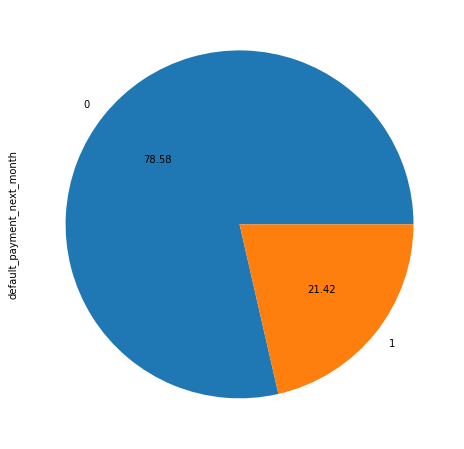

In [ ]:
# Pie chart visualization of default credit card features
data['default_payment_next_month'].value_counts().plot(kind='pie', figsize=(8,8), autopct='%.2f')

Description of the default Payment Feature Visualization:

The pie chart visualization shows the default payment history of using credit card services. Based on the visualization, it shows that customers who use credit cards are more dominant by 78.58% who do not make default payments from all expenses that customers have made, be it the use of consumption costs, health, fashion and other life support needs. Of the total cost consumption that has been done. Meanwhile, credit card users who only make default payments are 21.42%. When compared to the percentage of default payments that do not pay and make payments, the comparison is very different. This can be an evaluation for banks providing credit card services to be more selective in asking customers to pay the default according to what they have used. In order to avoid unwanted losses for bank companies providing credit card services.

In [ ]:
eda1 = data.groupby('default_payment_next_month').mean()[['bill_amt_1','bill_amt_2','bill_amt_3','bill_amt_4','bill_amt_5','bill_amt_6']]
eda1 

,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6
default_payment_next_month,,,,,,
0,52343.348069,50616.744635,48277.999142,44242.142060,40775.722318,39590.152361
1,51292.557480,50768.069291,48099.437795,43530.267717,41617.867717,40444.259843


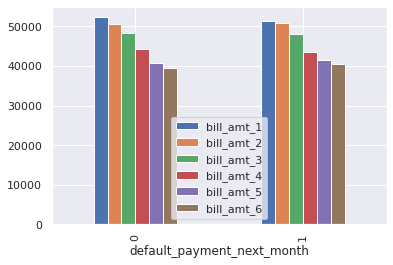

In [ ]:
sns.set_theme(style="darkgrid")
eda1.plot(kind='bar')

Based on the bar chart visualization above of Default Payments, for various AMT billing averages for several months in 2005.
Default payments that are not made or not paid off by credit card users. The average number of invoices that were not made from the default payment in April(Bill_amt_6) was 39590 NT dollars, May(Bill_amt_5) was 40775 NT dollars, June(Bill_amt_4) was 44242 NT dollars, July(Bill_amt_3) was 48277 NT ​​dollars , August(Bill_amt_2) was 50616 NT dollars and September(Bill_amt_1) was 52343 NT dollars. This indicates that the average billing amount from April to September 2005 was not made by default payments for the previous month.

Whereas
Default payments made or have been paid by credit card users. The average number of invoices made from the default payment in April(Bill_amt_6) was 40444 NT dollars, May(Bill_amt_5) was 41617 NT dollars, June(Bill_amt_4) was 43530 NT dollars, July(Bill_amt_3) was 48099 NT dollars , August(Bill_amt_2) was 50768 NT dollars and September(Bill_amt_1) was 51292 NT dollars. This indicates that the average number of invoices from April to September 2005 has made default payments for the previous month.

Based on information visually, that some credit card users have a very large average number of bills that have not made payments and are almost equivalent to credit users who make payments, this can be an evaluation for the credit card department's debt/bank fee collection team to maintain bills that are often made by customers, but also try to make these bills payable.

In [ ]:
eda2=data.groupby('default_payment_next_month').mean()[['pay_amt_1','pay_amt_2','pay_amt_3','pay_amt_4','pay_amt_5','pay_amt_6']]
eda2

,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
default_payment_next_month,,,,,,
0,7070.179399,7165.855794,5823.500429,4933.536481,5491.157940,5986.556652
1,3702.329134,2994.491339,2681.051969,3195.811024,2792.908661,3166.981102


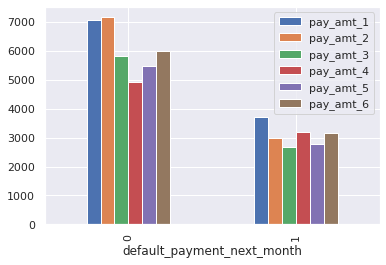

In [ ]:
eda2.plot(kind='bar')

Based on the bar chart visualization above of Default Payments, for various AMT payment averages for several months in 2005. Default payments that were not made or not paid off by credit card users. The average amount of fees/payments made from the default payment in April(Payment ATM_6) is 5986 NT dollars, May(Payment ATM_5) is 5491 NT dollars, June(Payment ATM_4) is 4933 NT dollars, July(Payment ATM_3) is 5823 NT dollars , August(Payment ATM_2) is 7165 NT dollars and September(Payment ATM_1) is 7070 NT dollars. This indicates that the average number of fees/payments from April to September 2005 did not default on the previous month.

Meanwhile, the default payment is made or has been paid by the credit card user. The average amount of fees/payments made from the default payment in April(Payment ATM_6) of 3166 NT dollars, May(Payment ATM_5) of 2792 NT dollars, June(Payment ATM_4) of 3195 NT dollars, July(Payment ATM_3) of 2681 NT dollars , August(Payment ATM_2) was 2994 NT dollars and September(Payment ATM_1) was 3702 NT dollars. This indicates that the average number of fees/payments from April to September 2005 has defaulted for the previous month.

Based on information visually, that some credit card users have a very large average number of fees/payments that have not made a default payment compared to credit card users who make payments, this can be an evaluation for the credit card department's bank fee collection team for more information. aggressively ordering its customers to pay on time every month, so that the high number of customers who have not made payments can decrease.

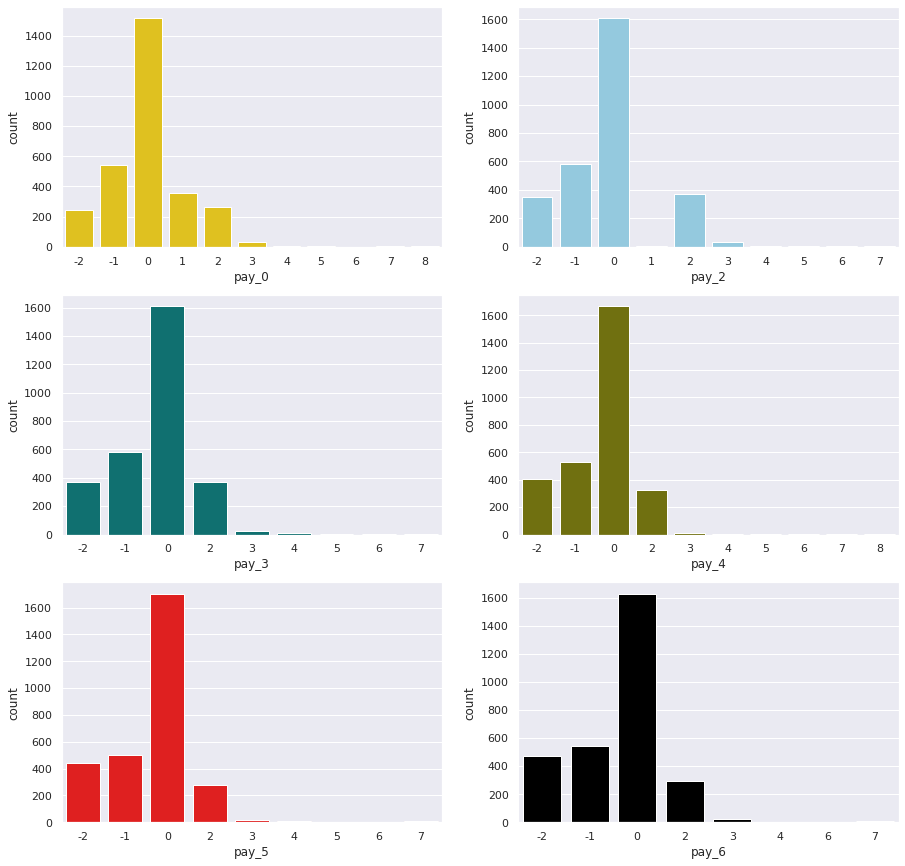

In [ ]:
# Visualization of histograms for features in the form of numeric data from the default credit card database table
fig,axs=plt.subplots(3,2, figsize=(15,15))
sns.countplot(data=data, x='pay_0', color='gold', ax=axs[0,0])
sns.countplot(data=data, x='pay_2', color='skyblue', ax=axs[0,1])
sns.countplot(data=data, x='pay_3', color='teal', ax=axs[1,0])
sns.countplot(data=data, x='pay_4', color='olive', ax=axs[1,1])
sns.countplot(data=data, x='pay_5', color='red', ax=axs[2,0])
sns.countplot(data=data, x='pay_6', color='black', ax=axs[2,1])
plt.show()

Description of Feature Visualization with categorical data as follows:

Description of the repayment data that the index measurement and its description are -2 = no consumption, -1 = pay fairly, 0 = use of revolving credit, 1 = late payment for one month, 2 = late payment for two months, … 8 = late payment for eight months, 9 = late payments for nine months and over

Categorical data histogram visualization:
1. Data Pay_0 for September 2005 which can be interpreted regarding the settlement of various amounts of fees that have been incurred through credit card transactions. The Pay_0 column for September 2005 has the form of data that is normally distributed with a left sloping line, which means that the data set is on the left tail side. Based on the histogram visualization, it can also be seen that most of the Pay_0 data for September 2005 gathered in a set with a value of 0. Value 0 means the use of revolving credit for permanent working capital financing, where the withdrawal of funds is in accordance with the needs of the debtor using Promissory Notes/Promissory Notes, provided that it does not exceed the amount ceiling that has been agreed between the Bank and the debtor. Some are in the set value of -1 for fair payer reviews and -2 for no consumption of credit card usage from customers, meaning that customers only make half or reasonable payments and some have not paid off credit cards. Payments in the third month tend to be done, it can be seen visually that the average credit card user makes the payment in the third month at the latest and so on.
2. Visually, the data characteristics of Pay_0, Pay_2 in August 2005, Pay_3 in July 2005, Pay_4 in June 2005, Pay_5 in May 2005 and Pay_6 in April 2005 are almost the same, namely the data gathered in a set of 0 means the use of revolving credit for financing permanent working capital, the withdrawal of funds in accordance with the needs of the debtor by using a promissory note / promissory note. But also some of the data is gathered in the left tail at set -1 which means that customers only make half or reasonable payments and set -2 which means that there is no consumption of credit card usage from customers. Payments in the third month tend to be made, it can be seen visually that the average credit card user makes payments in the third month at the latest and so on.

Based on the visualization of the many repayment sets on the left tail of the histogram, which means that many customers do not pay off their credit cards every month, this can be an evaluation for banks providing credit card services, to better warn customers who do not pay off immediately to pay off their fees, so that there is no loss for the credit card service provider bank.

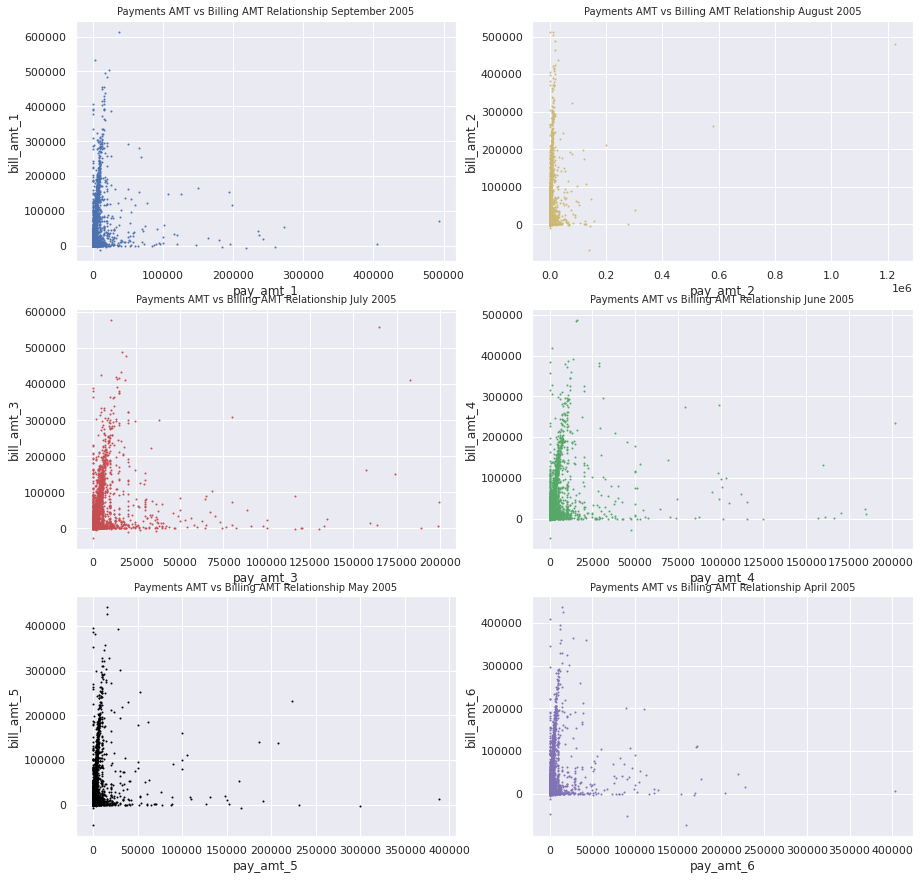

In [ ]:
# Scatter Plot of the relationship between payments AMT and bills AMT
plt.subplots(figsize=(15,15))
plt.subplot(321)
plt.scatter(x=data.pay_amt_1, y=data.bill_amt_1, c='b', s=1)
plt.xlabel('pay_amt_1')
plt.ylabel('bill_amt_1')
plt.title('Payments AMT vs Billing AMT Relationship September 2005', fontsize=10)

plt.subplot(322)
plt.scatter(x=data.pay_amt_2, y=data.bill_amt_2, c='y', s=1)
plt.xlabel('pay_amt_2')
plt.ylabel('bill_amt_2')
plt.title('Payments AMT vs Billing AMT Relationship August 2005', fontsize=10)

plt.subplot(323)
plt.scatter(x=data.pay_amt_3, y=data.bill_amt_3, c='r', s=1)
plt.xlabel('pay_amt_3')
plt.ylabel('bill_amt_3')
plt.title('Payments AMT vs Billing AMT Relationship July 2005', fontsize=10)

plt.subplot(324)
plt.scatter(x=data.pay_amt_4, y=data.bill_amt_4, c='g', s=1)
plt.xlabel('pay_amt_4')
plt.ylabel('bill_amt_4')
plt.title('Payments AMT vs Billing AMT Relationship June 2005', fontsize=10)

plt.subplot(325)
plt.scatter(x=data.pay_amt_5, y=data.bill_amt_5, c='black', s=1)
plt.xlabel('pay_amt_5')
plt.ylabel('bill_amt_5')
plt.title('Payments AMT vs Billing AMT Relationship May 2005', fontsize=10)

plt.subplot(326)
plt.scatter(x=data.pay_amt_6, y=data.bill_amt_6, c='m', s=1)
plt.xlabel('pay_amt_6')
plt.ylabel('bill_amt_6')
plt.title('Payments AMT vs Billing AMT Relationship April 2005', fontsize=10)
print('     ')

Based on the scatterplot visualization of the relationship between AMT Payments and AMT Bills in the last 6 months in 2005.
1. The relationship between payment 1 and bill 1 in September 2005 shows a positive relationship. Where an increase in payment feature 1 is also followed by an increase in billing feature 1. The scatter plot of the relationship between payment 1 and bill 1 can also show outliers. Outliers of the two data are extreme which may result from an abnormal situation.
2. All visualizations regarding, Relationship payment 1 with bill 1 in September 2005, Relationship payment 2 with bill 2 in August 2005, Relationship payment 3 with bill 3 in July 2005, Relationship payment 4 with bill 4 in June 2005, The relationship between payment 5 and bill 5 in May 2005 and the relationship between payment 6 and bill 6 in April 2005, have almost the same scatterplot distribution, which shows a positive relationship. The increase in the payment feature was also followed by an increase in the billing feature. The scatter plot of the relationship between payments and invoices can also indicate the presence of outliers. Outliers of the two data are extreme which may result from an abnormal situation.

Based on the visualization of the scatterplot relationship between the payment feature and the bill, it means that if you have a lot of large cost bills, you will make a big payment too. There was a high fee payment due to the bill for all consumption needs of credit card user customers.

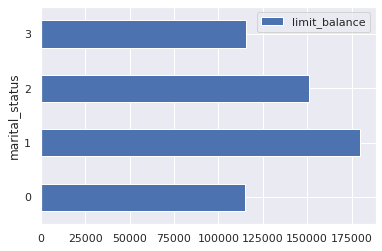

In [ ]:
data.groupby(by='marital_status')[['limit_balance']].mean().plot(kind='barh')

Description of marital status data (0=divorced, 1=married, 2=single, 3=other) and balance limit in the form of limit data on the amount of credit given in dollars. Visualization of the average balance limit data seen through marriage status. For the type of marital status in the form of being married, the balance limit is greater in transaction fees using credit cards. Marriages with married status usually have large living expenses such as household needs, food, school fees for their children and others, all of these needs prove that the balance limit has a higher portion. The second order is occupied by singles, the need for single marital status is usually in the form of adults in their early 20s, where their needs pay more attention to fashion and unique cuisine so that their selling price is categorized as quite high, then followed by divorced marital status and others.

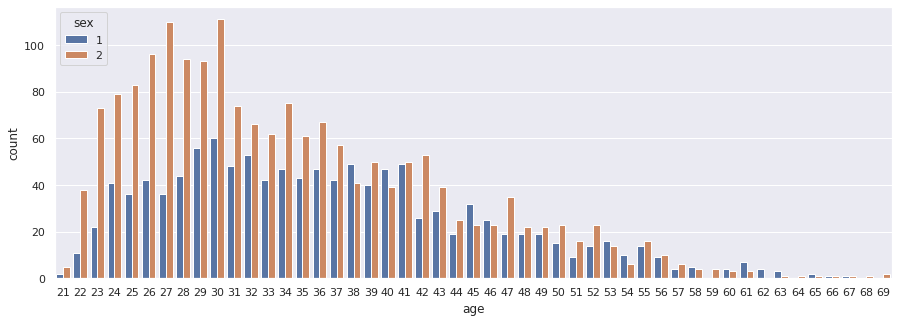

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot("age", hue = 'sex', data=data)
plt.show()

Based on the visualization of gender with each age, it can be seen that the highest credit card users are used by the age group of 25 to 31 years.

In [ ]:
eda3= data['default_payment_next_month'].groupby(data['sex']).value_counts(normalize=True)
eda3

sex  default_payment_next_month
1    0                             0.774721
     1                             0.225279
2    0                             0.793008
     1                             0.206992
Name: default_payment_next_month, dtype: float64

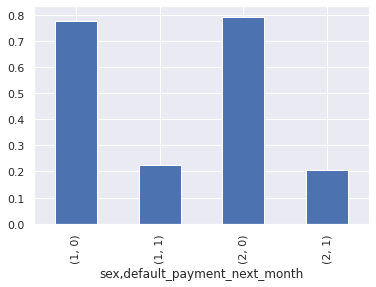

In [ ]:
eda3.plot(kind='bar')

Based on the results of the visualization of the default payment query by gender, 77% of male credit card users who do not make default payments and 22% of male credit card users make default payments. So, there are more male credit card users who do not make default payments than those who make payments.

Meanwhile, female credit card users who do not make default payments are 79% and women who use credit cards make default payments by 20%. So, there are more female credit card users who do not make default payments than those who make payments.

When compared between the two sexes, there is a higher percentage of women who have not made default payments than men. This can be an evaluation for bank companies providing credit card services to pay more attention to customers based on gender who have not fulfilled their obligations in default payments.

# 5 - Data Preprocessing

> This section contains the process of preparing data for the model training process, such as dividing the data into train-dev-test, data transformation (normalization, encoding, etc.), and other necessary processes.

## 5a - Data Inference

Quoted from aws.amazon.com, Inference is the process of making predictions using a trained model. Inference model is data that is not available in the dataset, if the searched data does not exist, then new data is entered. So the inference model is new data that is not in the data set. Data inference uses existing datasets.

The dataset is divided into two, namely inference set and non inference set (Train set & Test set)

In [ ]:
# Get Data for Model Inference
# Using pandas sample by calling 10 random data and random_state is used so that the selected random state remains the same
datainfernce = data.sample(10, random_state=10) 
datainfernce # It is assumed that there are 10 income groups that are not in the default credit card dataset

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2360,30000,1,2,2,38,4,3,4,4,4,...,20601,19992,19392,3000,1000,786,0,0,0,1
2871,230000,1,3,2,28,0,-1,-1,-1,-1,...,18844,34983,53935,65722,20000,18844,34983,408,14574,0
1442,230000,2,1,2,27,0,0,0,0,-1,...,3234,4696,7062,5097,1060,1000,4696,7062,10898,0
2032,80000,1,2,1,34,1,-2,-1,-1,-1,...,41300,0,0,0,862,41300,0,0,10000,0
1561,420000,1,1,1,34,-1,0,0,0,-2,...,-16,-16,-16,3048,3016,0,0,0,3262,0
934,20000,1,2,1,24,0,0,0,0,0,...,12714,13059,13193,1500,1600,700,700,500,1000,1
2917,360000,2,2,2,26,-1,-1,-1,-1,-2,...,0,0,0,463,2500,0,0,0,0,0
1013,490000,1,1,1,41,0,0,0,0,0,...,102736,105083,107334,3600,4000,4000,4000,4000,4000,0
913,360000,1,2,1,40,0,0,0,-1,0,...,45895,27851,25408,10034,15011,45919,5036,5022,6010,0
1242,150000,1,2,2,49,0,0,0,0,0,...,76333,77956,77553,2985,2700,5000,2823,2865,2679,1


From a collection of information on the default credit card dataset, there are 10 data that are suspected of not being included in the dataset or but contained in the data inference section.

In [ ]:
# Remove Inference Set from Data Set

data_train_test = data.drop(datainfernce.index)
data_train_test

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000,1,1,2,39,0,0,0,0,0,...,50803,30789,15874,1800,2000,3000,2000,2000,2000,0
1,110000,2,1,2,29,0,0,0,0,0,...,32489,26354,20221,2000,2010,3000,3000,3000,1000,0
2,270000,1,1,2,36,0,0,0,2,0,...,40335,37165,22156,10076,4018,14,2051,2000,0,0
3,130000,1,1,1,45,0,0,0,0,0,...,62377,63832,65099,2886,2908,2129,2354,2366,2291,0
4,50000,1,1,2,24,0,0,0,0,0,...,19837,19855,20151,1367,1606,692,709,721,692,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,210000,2,2,1,39,-1,-1,-1,-1,-2,...,0,0,12000,0,28428,0,0,12000,33664,0
2961,280000,2,1,1,41,2,-1,-1,-1,-2,...,0,0,244,6859,486,0,0,244,0,0
2962,80000,1,1,2,28,1,-1,-1,-1,-2,...,0,0,0,47,207,0,0,0,0,0
2963,200000,1,2,1,53,1,-1,-1,-2,-2,...,0,0,6753,2920,0,0,0,6753,0,1


In [ ]:
data.shape

(2965, 24)

Before separating the inference data from that dataset, the initial dataset of the default credit card has 2965 rows and then removing/separating the inference data from the default credit card dataset changes to 2955 rows.

In [ ]:
# Reset Index
# In order to avoid unwanted occurrences, the data is reset its index for sequencing

data_train_test.reset_index(drop=True, inplace=True)
datainfernce.reset_index(drop=True, inplace=True)
datainfernce

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,30000,1,2,2,38,4,3,4,4,4,...,20601,19992,19392,3000,1000,786,0,0,0,1
1,230000,1,3,2,28,0,-1,-1,-1,-1,...,18844,34983,53935,65722,20000,18844,34983,408,14574,0
2,230000,2,1,2,27,0,0,0,0,-1,...,3234,4696,7062,5097,1060,1000,4696,7062,10898,0
3,80000,1,2,1,34,1,-2,-1,-1,-1,...,41300,0,0,0,862,41300,0,0,10000,0
4,420000,1,1,1,34,-1,0,0,0,-2,...,-16,-16,-16,3048,3016,0,0,0,3262,0
5,20000,1,2,1,24,0,0,0,0,0,...,12714,13059,13193,1500,1600,700,700,500,1000,1
6,360000,2,2,2,26,-1,-1,-1,-1,-2,...,0,0,0,463,2500,0,0,0,0,0
7,490000,1,1,1,41,0,0,0,0,0,...,102736,105083,107334,3600,4000,4000,4000,4000,4000,0
8,360000,1,2,1,40,0,0,0,-1,0,...,45895,27851,25408,10034,15011,45919,5036,5022,6010,0
9,150000,1,2,2,49,0,0,0,0,0,...,76333,77956,77553,2985,2700,5000,2823,2865,2679,1


In the data inference section, the index is not sorted because it adjusts the location of the rows of data that are not included in the default credit card dataset, but after resetting the index, the index number is arranged. Restart the index, so that when it is run down or the process is complete, if there is an error in the results, it is certain that it is not because the index is messy or irregular.

## 5b. - Splitting Datasets

Splitting Data is splitting to make X as a feature and Y as a target into Train/Test. Train/test split as a method that can be used to evaluate the performance of machine learning models.

In [ ]:
# Separation of `X` (Feature) and `y` (Target)
# removing column axis=1 default payment, to be included and divided into train/test
X = data_train_test.drop('default_payment_next_month', axis=1) 
y = data_train_test['default_payment_next_month']

In [ ]:
# Split between Train-Set and Test-Set

# Entering x and y values, test_size means split 80% for train, and 20% for test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
print('Train Size : ', X_train.shape)
print('Test Size : ', X_test.shape)

Train Size :  (2364, 23)
Test Size :  (591, 23)


The process of deleting the default payment column is carried out to be transferred as a training set and testing set, from the default payment data that has been transferred, then a tetrain_test_split process will be carried out, with 80% of the income group going to X_tarin and 20% going to y_train. X_train uses 2364(80%) of 2965 rows and y_train uses 591 (20% remaining) of 2965 rows.

## 5c - Feature Selection

Quoted from trivusi.web.id, Feature selection is a preprocessing technique by reducing the number of irrelevant features to determine the target class.

Feature selection can use a heat map, looking for the correlation value between the feature column and the target column as high as possible or as low as possible. Looking for a correlation that is close to 1 if the value is zero, it can be dropped because there is no correlation between the feature column and the target column. Desired targets must have a correlation.

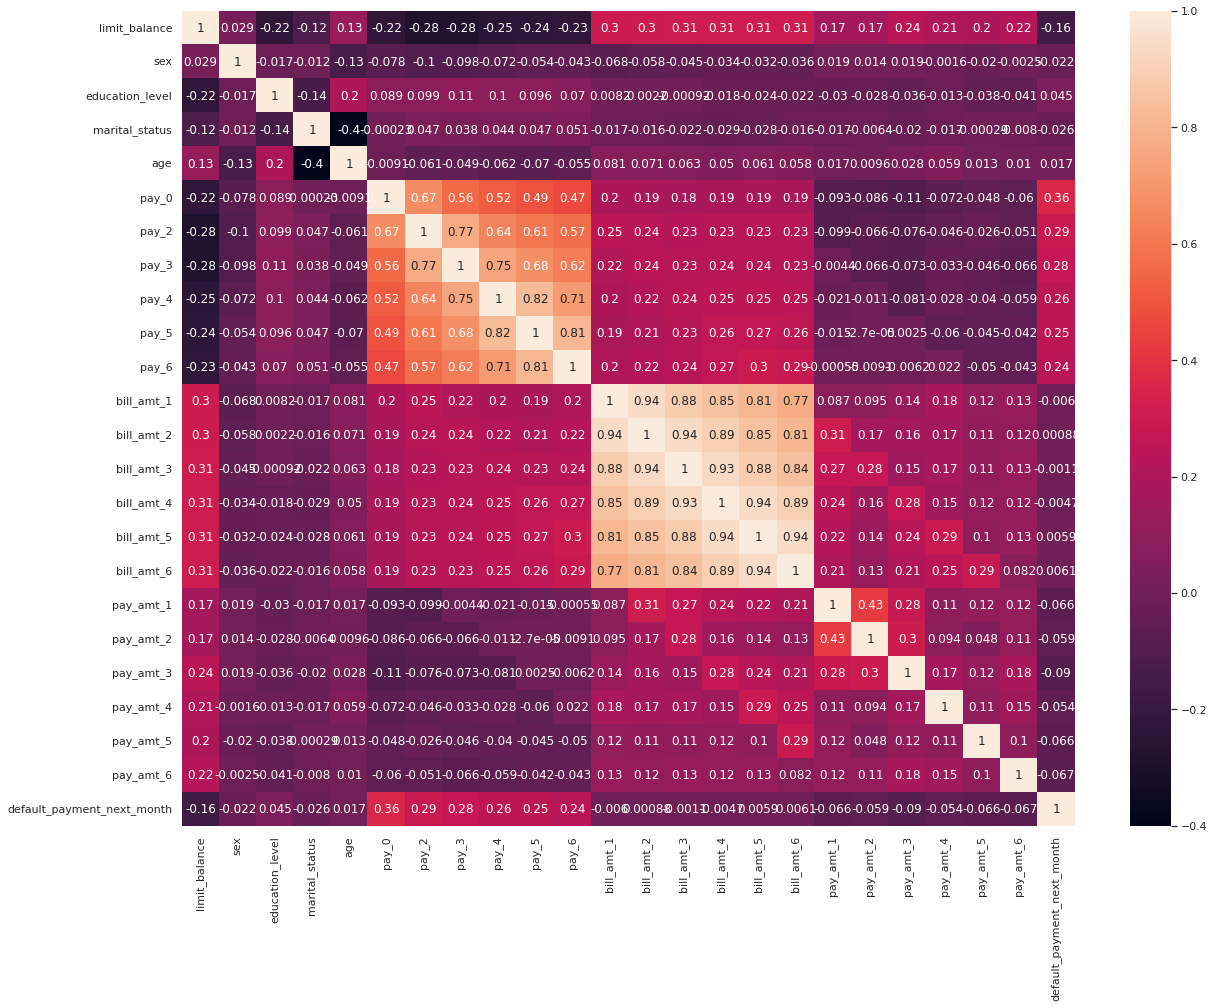

In [ ]:
# Seeing the Correlation between Features and targets
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(), annot=True)
plt.show()

Based on the correlation value of the default payment target with 14 features that are thought to affect it, pay_0, pay_2, pay_3, pay_4, pay_5 and pay_6 have a better score than the other 9 features. But to be more convincing, the feature importances process is carried out to see the highest feature score in influencing the default payment target.

In [ ]:
# Feature selection for features that will be used or suspected to affect the target
# Create a classification for n estimators of some features
Featureselection = RandomForestClassifier(n_estimators=100, random_state=0)
Featureselection.fit(X_train, y_train)

# Melihat nilai score hasil training untuk masing-masing fitur
score_Feature = pd.Series(Featureselection.feature_importances_, index=X_train.columns).sort_values(ascending=False)
score_Feature

pay_0              0.111958
age                0.061967
limit_balance      0.058145
bill_amt_1         0.052322
pay_amt_6          0.051598
pay_2              0.051135
bill_amt_6         0.049098
bill_amt_2         0.048129
bill_amt_5         0.047444
bill_amt_3         0.046768
pay_amt_1          0.045748
pay_amt_5          0.044388
bill_amt_4         0.043815
pay_amt_3          0.043794
pay_amt_4          0.043760
pay_amt_2          0.043612
pay_3              0.034473
pay_5              0.028792
pay_6              0.025818
pay_4              0.024093
education_level    0.018658
marital_status     0.012726
sex                0.011760
dtype: float64

The value of the feature score that is suspected of influencing the default payment produces a value from the largest to the highest. Based on the score, I chose 5 features, namely pay_0, age, limit_balance, bill_amt_1 and pay_2.

In [ ]:
# Remove unused features, only use features that are suspected of affecting the target
X_train.drop(['pay_amt_6','bill_amt_6','bill_amt_2','bill_amt_5','bill_amt_3','pay_amt_1',
              'pay_amt_5','bill_amt_4','pay_amt_3','pay_amt_4','pay_amt_2',
              'pay_3','pay_5','pay_6','pay_4','education_level','marital_status',
              'sex'], axis=1, inplace=True)
X_test.drop(['pay_amt_6','bill_amt_6','bill_amt_2','bill_amt_5','bill_amt_3','pay_amt_1',
              'pay_amt_5','bill_amt_4','pay_amt_3','pay_amt_4','pay_amt_2',
              'pay_3','pay_5','pay_6','pay_4','education_level','marital_status',
              'sex'], axis=1, inplace=True)

Based on feature selection, features that are not used will be immediately dropped or removed. The feature with a low score will not be used because it is suspected that it is not very good at influencing the default payment target.

## 5d - Handling Missing Value

Quoted from file.upi.edu.com, Missing value is information that is not available for an object (case). Missing value occurs because information for something about the object is not provided, is difficult to find, or simply does not exist. In this process, we will check the missing value data with .info() first:

In [ ]:
# Check Missing Values on X_train
X_train.isnull().sum()

limit_balance    0
age              0
pay_0            0
pay_2            0
bill_amt_1       0
dtype: int64

In [ ]:
# Check Missing Values on X_test
X_test.isnull().sum()

limit_balance    0
age              0
pay_0            0
pay_2            0
bill_amt_1       0
dtype: int64

In [ ]:
# Check Missing Values on y_train
y_train.isnull().sum()

0

In [ ]:
# Check Missing Values on y_test
y_test.isnull().sum()

0

After handling the missing value, the X_train, X_test, y_train and y_test variables indicate that there is no missing value, which means it is clean from Nan data. Next will be handling outliers.

## 5e - Handling Outlier

In [ ]:
# Function to create histograms and boxplots.
# This function takes the census_adult_income dataframe and the desired variable as arguments.

def diagnostic_plots(data, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=data[variable])
    plt.title('Boxplot')

    plt.show()

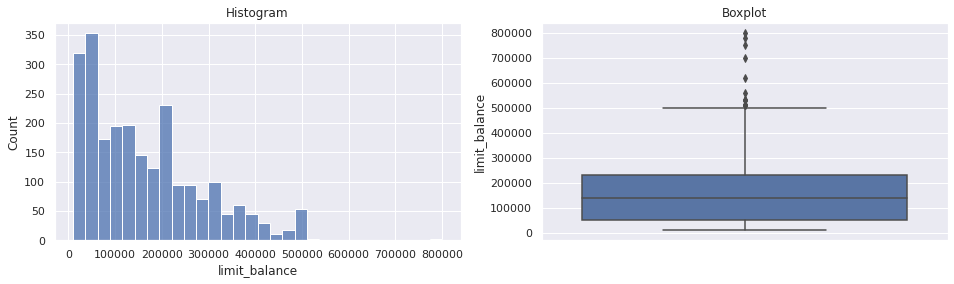


Skewness Value limit_balance :  1.0283493990109487


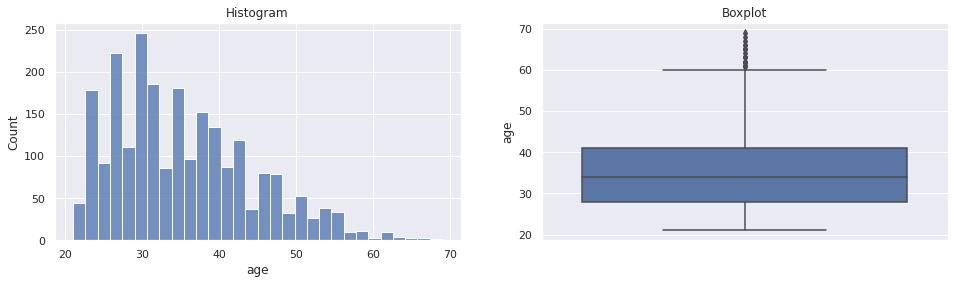


Skewness Value age :  0.7452104622455802


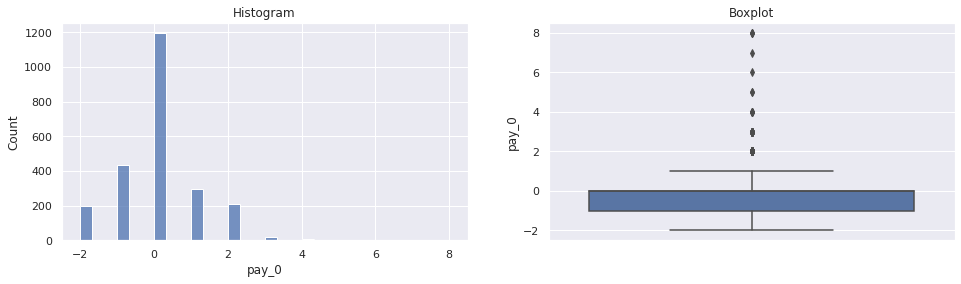


Skewness Value pay_0 :  0.9546149660646626


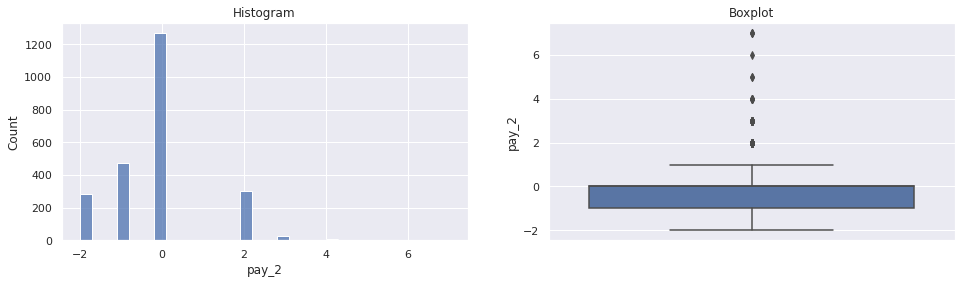


Skewness Value pay_2 :  0.8848724500836598


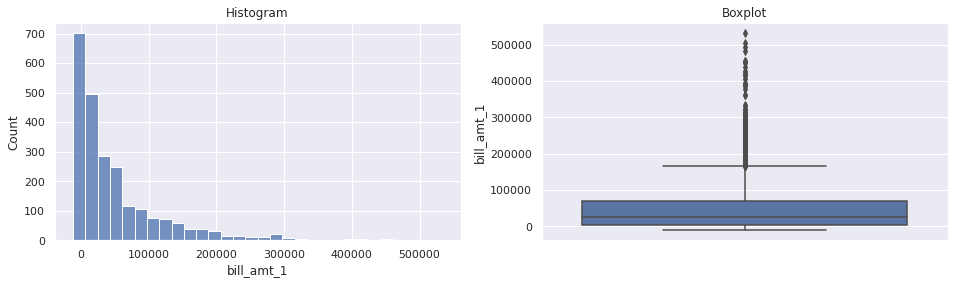


Skewness Value bill_amt_1 :  2.4523699190198145


In [ ]:
# Check distribution of features and outliers using Boxplot

diagnostic_plots(X_train, 'limit_balance')
print('\nSkewness Value limit_balance : ', X_train['limit_balance'].skew())

diagnostic_plots(X_train, 'age')
print('\nSkewness Value age : ', X_train['age'].skew())

diagnostic_plots(X_train, 'pay_0')
print('\nSkewness Value pay_0 : ', X_train['pay_0'].skew())

diagnostic_plots(X_train, 'pay_2')
print('\nSkewness Value pay_2 : ', X_train['pay_2'].skew())

diagnostic_plots(X_train, 'bill_amt_1')
print('\nSkewness Value bill_amt_1 : ', X_train['bill_amt_1'].skew())

It is said to be normally distributed when the value of the skewness ratio is in the value range of -2 to 2. The four features are limit_balance, age, pay_0 and pay_2, all data are normally distributed because they have skewness values according to the standard. While the bill_amt_1 feature has data that is not normally distributed because it has a skewness value that does not match the standard. Visualization of boxplot features limit_balance, age, pay_0, pay_2 and bill_amt_1, there are outliers in the upper boxplot/top boxplot. Therefore, the IQR value will be searched first to equalize the range of values to enter the boxplot. And make the data to be normally distributed.

In [ ]:
# Calculate / determine the IQR value for data that has outliers
X_train_ = Winsorizer(capping_method='iqr', # Select iqr for IQR rule limit or gaussian for mean and std
                          tail='both',
                          fold=1.5,
                          variables=['limit_balance','age','pay_0','pay_2','bill_amt_1'])
X_train_.fit(X_train)
X_trainn = X_train_.transform(X_train) 

After we know the features that contain outliers, then the outliers will be overcome by using the interquartile range (IQR) method. IQR will tolerate a minimum value that is far from the data and a maximum value that is away from the data set, by changing the minimum and maximum ranges into the appropriate data set group. The IQR obtained will be multiplied by 1.5 for the right and left sides. Because the four features have ouliers, oulier handling will be carried out using the capping winsorizer method, where the five features limit_balance, age, pay_0, pay_2 and bill_amt_1 will be tolerated with the minimum and maximum data ranges being the same group.

In [ ]:
# Outlier data comparison check
# Check the minimum limit for each variable
print('Left Tail Caps  : ', X_train_.left_tail_caps_)
print('           ')
# Check the maximum limit for each variable
print('Right Tail Caps : ', X_train_.right_tail_caps_)

Left Tail Caps  :  {'limit_balance': -220000.0, 'age': 8.5, 'pay_0': -2.5, 'pay_2': -2.5, 'bill_amt_1': -93333.875}
           
Right Tail Caps :  {'limit_balance': 500000.0, 'age': 60.5, 'pay_0': 1.5, 'pay_2': 1.5, 'bill_amt_1': 165549.125}


Based on the minimum oulier value for the limit_balance feature is -220000 and the maximum oulier value is 500000. The minimum age feature is 8.5 and the maximum value is 60.5. The minimum feature pay_0 limit is -2.5 and the maximum value is 1.5. The minimum limit of the bill_amt_1 feature is -93333 and the maximum value is 165549. The minimum limit of the pay_2 feature is -2.5 and the maximum value is 1.5. These values represent the lowest and highest extreme values, away from the proper data set.



limit_balance - After Handling Outlier Capping

Skewness Value limit_balance :  0.9058998410695674


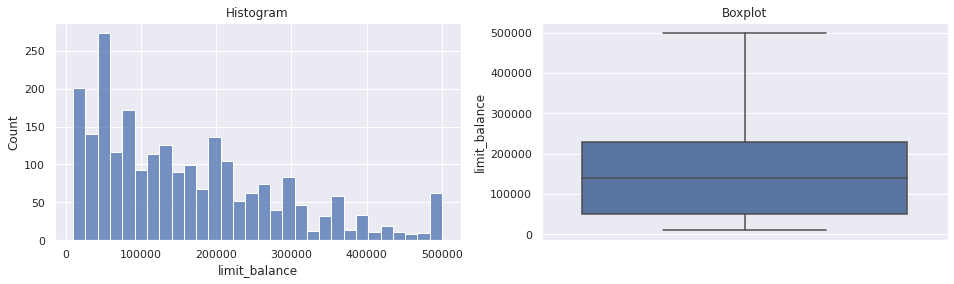


age - After Handling Outlier Capping

Skewness Value age :  0.6853188986766607


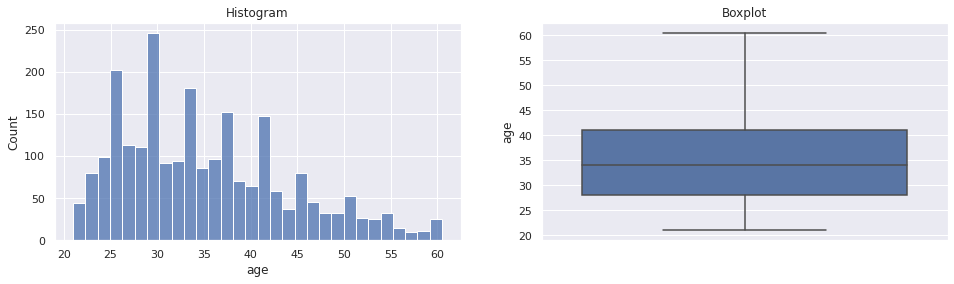


pay_0 - After Handling Outlier Capping

Skewness Value pay_0 :  -0.23618806566238093


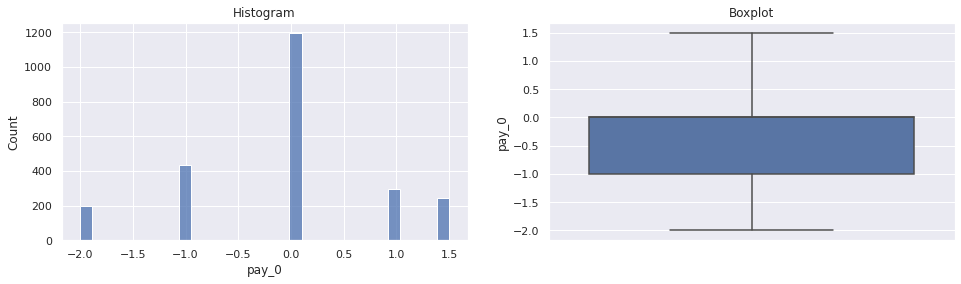


pay_2 - After Handling Outlier Capping

Skewness Value pay_2 :  -0.02614456212798914


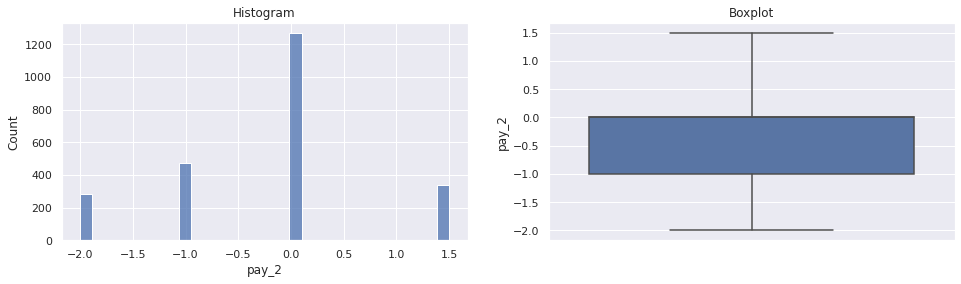


bill_amt_1 - After Handling Outlier Capping

Skewness Value bill_amt_1 :  1.181905607625538


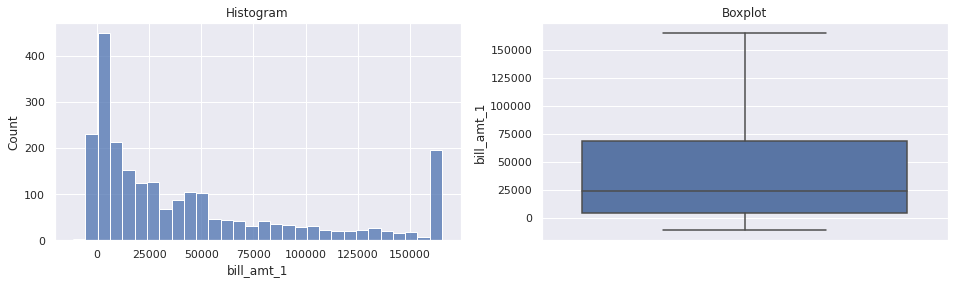

In [ ]:
# Visualization After Handling Outlier
print('\nlimit_balance - After Handling Outlier Capping')
print('\nSkewness Value limit_balance : ', X_trainn['limit_balance'].skew())
diagnostic_plots(X_trainn, 'limit_balance')

print('\nage - After Handling Outlier Capping')
print('\nSkewness Value age : ', X_trainn['age'].skew())
diagnostic_plots(X_trainn, 'age')

print('\npay_0 - After Handling Outlier Capping')
print('\nSkewness Value pay_0 : ', X_trainn['pay_0'].skew())
diagnostic_plots(X_trainn, 'pay_0')

print('\npay_2 - After Handling Outlier Capping')
print('\nSkewness Value pay_2 : ', X_trainn['pay_2'].skew())
diagnostic_plots(X_trainn, 'pay_2')

print('\nbill_amt_1 - After Handling Outlier Capping')
print('\nSkewness Value bill_amt_1 : ', X_trainn['bill_amt_1'].skew())
diagnostic_plots(X_trainn, 'bill_amt_1')

Visualization of histogram for normal distribution and boxplot identification of oulier data, based on the picture above that the limit_balance, age, pay_0, pay_2 and bill_amt_1 features remain normally distributed as before. It is said to be normally distributed when the value of the skewness ratio is in the range of values of -2 to 2, where the five features have a skewness value according to the determination standard. The oulier data no longer exists, because all data from the limit_balance, age, pay_0, pay_2 and bill_amt_1 features that are away from the center of the sample mean have all been censored to have the same range in the data set. So that there are no more data outliers.

In [ ]:
# Obtained X_trainn that has been done feature engineering
# X_trainn variable is clean from Missing Value and Outlier
X_trainn

,limit_balance,age,pay_0,pay_2,bill_amt_1
96,50000.0,23.0,0.0,0.0,49026.000
1182,130000.0,31.0,0.0,0.0,95292.000
2191,100000.0,33.0,-2.0,-2.0,5576.000
984,80000.0,40.0,-1.0,0.0,7111.000
2736,300000.0,34.0,-1.0,-1.0,37505.000
...,...,...,...,...,...
2009,200000.0,34.0,-2.0,-2.0,6626.000
1180,500000.0,29.0,0.0,0.0,165549.125
1344,180000.0,34.0,1.5,0.0,51385.000
527,50000.0,49.0,0.0,0.0,48501.000


So that a new variable is obtained in the form of X_trainn which is clean from missing values and outliers. For the X_test variable, it is clear of the missing value and the oulier does not need to be done.

## 5f - Numerical and Categorical Column Separation

Quoted from idikuu.com, Numerical data is data that can be measured, then we can process the data in such a way as to be sorted, searched for the average, most appear and so on. While categorical data is a type of data consisting of variables or data from grouping results based on predetermined categories. Based on the definition of the two types of data, that there are differences in the characteristics of the data in each feature, therefore it must be separated.

In [ ]:
# Separation of numeric data and categorical data
num_fitur = ['limit_balance','age','bill_amt_1']
col_fitur = ['pay_0','pay_2']

# Standardize the range of numeric and categorical data, so that they have the same range between features
num_col = Pipeline([("numscaler",MinMaxScaler())])
cat_col = Pipeline([("catscaler",OneHotEncoder(handle_unknown='ignore', sparse=False))])

# Processing numeric and categorical data that have the same range
preprocessor = ColumnTransformer(
    transformers=[
        ("numerik", num_col, num_fitur),
        ("kategorik", cat_col, col_fitur)])


The separation process is carried out according to the type of data from each feature, for example numerical features in the form of limit_balance, age and bill_amt_1. and categorical features in the form of pay_0 and pay_2. Purpose of splitting by data type, to make it easier to equalize across features.

# 6 - Model Definition

> This section contains cells to define the model. Explain the reasons for using an algorithm/model, the hyperparameters used, the types of metrics used, and other things related to the model.

## 6a - Model Definition Logistic Regression

In [ ]:
# Model definition for logistic regression algorithm
pipelog = Pipeline([("LogScaler",preprocessor), ("LogReg",LogisticRegression())])

In [ ]:
# Finding the value of cross validation logistic regression
kf=KFold(n_splits=5)
scoreslog = cross_val_score(pipelog, X_trainn, y_train, cv=kf)
print("--Logistic Regression--")
print("Cross Validation array           :",scoreslog)
print("Best Cross Validation score      :",scoreslog.mean())
print("Standar Deviasi Cross Validation :",scoreslog.std())

--Logistic Regression--
Cross Validation array           : [0.82875264 0.87103594 0.80338266 0.83298097 0.82627119]
Best Cross Validation score      : 0.8324846812627656
Standar Deviasi Cross Validation : 0.021844491133877878


Model definition Logistics Regression algorithm is an analytical method to describe the relationship between targets that have two or more categories with one or more independent variables on a categorical scale. Logistic regression has a cross validation value of 83.24% and a cross validation standard deviation of 0.0218.

## 6b - Model Definition Support Vector Machine (SVM)

In [ ]:
# Model definition for svm algorithm
pipesvm = Pipeline([("SVMscaler", preprocessor), ("svm", SVC())])

In [ ]:
# Find the value of cross validation svm
kf=KFold(n_splits=5)
scoressvm = cross_val_score(pipesvm, X_trainn, y_train, cv=kf)
print("--Support Vector Machine--")
print("Cross Validation array           :",scoressvm)
print("Best Cross Validation score      :",scoressvm.mean())
print("Standar Deviasi Cross Validation :",scoressvm.std())

--Support Vector Machine--
Cross Validation array           : [0.82875264 0.86680761 0.80338266 0.83932347 0.82627119]
Best Cross Validation score      : 0.8329075142437382
Standar Deviasi Cross Validation : 0.020607773327018644


The Support Vector Machine (SVM) definition algorithm method is a method that uses a hypothetical space in the form of linear functions in a feature that has high dimensions and is trained using a learning algorithm based on optimization theory. SVM has a cross validation value of 83.29% and a cross validation standard deviation of 0.0206.

## 6c - Model Definition Decision Tree

In [ ]:
# Model definition for decision tree algorithm
pipeDT = Pipeline([("DTsacler",preprocessor), ("DTC",DecisionTreeClassifier(random_state=10))])

In [ ]:
# Finding the value of the cross validation decision tree
kf=KFold(n_splits=5)
scoresDT = cross_val_score(pipeDT, X_trainn, y_train, cv=kf)
print("--Decision Tree--")
print("Cross Validation array           :",scoresDT)
print("Best Cross Validation score      :",scoresDT.mean())
print("Standar Deviasi Cross Validation :",scoresDT.std())

--Decision Tree--
Cross Validation array           : [0.73361522 0.73572939 0.72515856 0.71247357 0.7690678 ]
Best Cross Validation score      : 0.7352089081592432
Standar Deviasi Cross Validation : 0.018799680736520726


Model definition algorithm Decision tree is a method used to assist the decision-making process because the structure of the solution resembles a complete tree with roots, trunks, and branches. Decision Tree has a cross validation value of 73.52% and a cross validation standard deviation of 0.0187.

## 6d - Model Definition Random Forest

In [ ]:
# Model definition for random forest algorithm
pipeRF = Pipeline([("RFsacler",preprocessor), ("RFC",RandomForestClassifier(random_state=10))])

In [ ]:
# Finding the value of cross validation random forest
kf=KFold(n_splits=5)
scoresRF = cross_val_score(pipeRF, X_trainn, y_train, cv=kf)
print("--Random Forest--")
print("Cross Validation array           :",scoresRF)
print("Best Cross Validation score      :",scoresRF.mean())
print("Standar Deviasi Cross Validation :",scoresRF.std())

--Random Forest--
Cross Validation array           : [0.81183932 0.81183932 0.79069767 0.79915433 0.81779661]
Best Cross Validation score      : 0.8062654531121224
Standar Deviasi Cross Validation : 0.009879548496654405


Model Definition Random Forest algorithm is a collection of decision trees or decision trees. Random forest is a combination of each tree from the decision tree which is then combined into one model, used for large data sets. Random forest has a cross validation value of 80.62% and a cross validation standard deviation of 0.0098.

## 6e - Model Definition K-Nearest Neighbor (KNN)

In [ ]:
# Model definition for KNN algorithm
pipeKNN = Pipeline([("KNNscaler",preprocessor), ("KNN",KNeighborsClassifier())])

In [ ]:
# Finding the KNN cross validation value
kf=KFold(n_splits=5)
scoresKNN = cross_val_score(pipeKNN, X_trainn, y_train, cv=kf)
print("--K-Nearest Neighbor--")
print("Cross Validation array           :",scoresKNN)
print("Best Cross Validation score      :",scoresKNN.mean())
print("Standar Deviasi Cross Validation :",scoresKNN.std())

--K-Nearest Neighbor--
Cross Validation array           : [0.82241015 0.83509514 0.79281184 0.81606765 0.82627119]
Best Cross Validation score      : 0.8185311928906727
Standar Deviasi Cross Validation : 0.01426094124920524


Model Definition K-Nearest Neighbor (KNN) algorithm is one of the algorithms that classifies new data using the similarity between new data and a number of data (k) at the closest available location. KNN has a cross validation value of 81.85% and a cross validation standard deviation of 0.0142.

## 6f - Model Definition Naive Bayes

In [ ]:
# Model definition for Naive Bayes algorithm
pipeNB = Pipeline([("NBscaler",preprocessor), ("NB",BernoulliNB())])

In [ ]:
# Finding the value of Naive Bayes cross validation
kf=KFold(n_splits=5)
scoresNB = cross_val_score(pipeNB, X_trainn, y_train, cv=kf)
print("--Naive Bayes--")
print("Cross Validation array           :",scoresNB)
print("Best Cross Validation score      :",scoresNB.mean())
print("Standar Deviasi Cross Validation :",scoresNB.std())

--Naive Bayes--
Cross Validation array           : [0.81395349 0.84989429 0.80761099 0.81818182 0.80720339]
Best Cross Validation score      : 0.8193687963593363
Standar Deviasi Cross Validation : 0.015803691893436018


Model Definition Bernouli Naive Bayes algorithm is a suitable method for binary and multiclass classification by assigning class labels to instances/records. Bernoulli Naive Bayes where features are assumed to be binary (0s and 1s). Bernoulli Naive Bayes has a cross validation value of 81.93% and a cross validation standard deviation of 0.0158.

## 6g - Model Definition Adaptive Boosting (AdaBoosting)

In [ ]:
# Model definition for AdaBoosting algorithm
pipeAdaBC =Pipeline([("AdaBCscaler",preprocessor), ("AdaBC",AdaBoostClassifier(DecisionTreeClassifier(random_state=10)))])

In [ ]:
# Looking for AdaBoosting's cross validation value
kf=KFold(n_splits=5)
scoresAdaBC = cross_val_score(pipeAdaBC, X_trainn, y_train, cv=kf)
print("--AdaBoosting--")
print("Cross Validation array           :",scoresAdaBC)
print("Best Cross Validation score      :",scoresAdaBC.mean())
print("Standar Deviasi Cross Validation :",scoresAdaBC.std())

--AdaBoosting--
Cross Validation array           : [0.78224101 0.74841438 0.76109937 0.78858351 0.7690678 ]
Best Cross Validation score      : 0.7698812125989896
Standar Deviasi Cross Validation : 0.014430163961135735


Definition method of classification algorithm Adaptive Boosting (AdaBoosting) is a boosting method that is able to balance the class by giving weight to the classification error level. AdaBoosting has a cross validation value of 76.98% and a cross validation standard deviation of 0.0144.

Based on the best cross validation that the SVM algorithm is better than other types of algorithms with a CV of 83.29%, while the second best algorithm is Logistics Regression which has a CV value of 83.24%. Then the best hyperparameters will be searched for the SVM algorithm. I would also search the hyperparameters for the second best algorithm which is Logistic Regression.

# 7 - Model Training

> Cells in this section only contain code to train the model and the resulting output. Perform the training process several times with different hyperparameters to see the results obtained. Analyze and narrate these results in the Model Evaluation section.

## 7a - Model Training Logistic Regression

In [ ]:
# Best logistic regression training model without estimator
model_log_reg = pipelog.fit(X_trainn,y_train)

In [ ]:
# Finding the best parameter from a predetermined estimator
param_grid_log = {'LogReg__C': [0.01, 0.1, 1, 10, 100],
                  'LogReg__random_state':[10]}

In [ ]:
# Hyperparameter tuning performs a combination of estimators
gridlog = GridSearchCV(pipelog, param_grid_log, cv=5)
gridlog.fit(X_trainn,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('LogScaler',
                                        ColumnTransformer(transformers=[('numerik',
                                                                         Pipeline(steps=[('numscaler',
                                                                                          MinMaxScaler())]),
                                                                         ['limit_balance',
                                                                          'age',
                                                                          'bill_amt_1']),
                                                                        ('kategorik',
                                                                         Pipeline(steps=[('catscaler',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                    

In [ ]:
# Get the best estimator hyperparameter logistic regression training model
model_log_gridsearchCV = gridlog.best_estimator_
model_log_gridsearchCV

Pipeline(steps=[('LogScaler',
                 ColumnTransformer(transformers=[('numerik',
                                                  Pipeline(steps=[('numscaler',
                                                                   MinMaxScaler())]),
                                                  ['limit_balance', 'age',
                                                   'bill_amt_1']),
                                                 ('kategorik',
                                                  Pipeline(steps=[('catscaler',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['pay_0', 'pay_2'])])),
                ('LogReg', LogisticRegression(C=10, random_state=10))])

In [ ]:
# Finding the value of cross validation after hyperparameter best estimator
scores = cross_val_score(model_log_gridsearchCV, X_trainn, y_train, cv=5)
print("Cross Validation Score model_log_gridsearchCV array     :",scores)
print("Best Cross Validation Score model_log_gridsearchCV      : {:.2f}".format(gridlog.best_score_))
print("Standar Deviasi Cross Validation model_log_gridsearchCV : {:.2f}".format(gridlog.best_score_.std()))

Cross Validation Score model_log_gridsearchCV array     : [0.83086681 0.86046512 0.82875264 0.82875264 0.81991525]
Best Cross Validation Score model_log_gridsearchCV      : 0.83
Standar Deviasi Cross Validation model_log_gridsearchCV : 0.00


GridseachCV has done the best model, namely logistic regression. The best estimator or logistic regression hyperparameter is C = 10. Where before using the best parameter, the CV value is 83% and the cross validation standard deviation is 0.0218. Meanwhile, after using the best estimator C = 10, it has a CV value of 83% and a standard deviation of cross validation of 0.00. Based on this comparison, the cross validation value of the best hyperparameter estimation results and not using an estimate has the same value, which is 83%, but if viewed from the standard deviation value with the best estimate it is 0, meaning repeated validation where the training and testing dataset decreases the error value. the standard.

## 7b - Model Training Support Vector Machine (SVM)

In [ ]:
# The best svm training model without estimator
model_svm = pipesvm.fit(X_trainn,y_train)

In [ ]:
# Finding the best parameter from a predetermined estimator
param_grid_svm = {'svm__kernel' : ['rbf','linear','poly'],
                  'svm__C': [0.01, 0.1, 1, 10, 100], 
                  'svm__gamma': [0.1, 0.01, 0.001],
                  'svm__degree' : [1, 2, 3],
                  'svm__coef0' : [0, 1]}

In [ ]:
# Hyperparameter tuning performs a combination of estimators
gridsvm = GridSearchCV(pipesvm, param_grid_svm, cv=5)
gridsvm.fit(X_trainn,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('SVMscaler',
                                        ColumnTransformer(transformers=[('numerik',
                                                                         Pipeline(steps=[('numscaler',
                                                                                          MinMaxScaler())]),
                                                                         ['limit_balance',
                                                                          'age',
                                                                          'bill_amt_1']),
                                                                        ('kategorik',
                                                                         Pipeline(steps=[('catscaler',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                    

In [ ]:
# Get the best svm hyperparameter best estimator training model
model_svm_gridsearchCV = gridsvm.best_estimator_
model_svm_gridsearchCV

Pipeline(steps=[('SVMscaler',
                 ColumnTransformer(transformers=[('numerik',
                                                  Pipeline(steps=[('numscaler',
                                                                   MinMaxScaler())]),
                                                  ['limit_balance', 'age',
                                                   'bill_amt_1']),
                                                 ('kategorik',
                                                  Pipeline(steps=[('catscaler',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['pay_0', 'pay_2'])])),
                ('svm', SVC(C=1, coef0=0, degree=2, gamma=0.1, kernel='poly'))])

In [ ]:
# Finding the value of cross validation after hyperparameter best estimator
scores = cross_val_score(model_svm_gridsearchCV, X_trainn, y_train, cv=5)
print("Cross Validation Score model_svm_gridsearchCV array     :",scores)
print("Best Cross Validation Score model_svm_gridsearchCV      : {:.2f}".format(gridsvm.best_score_))
print("Standar Deviasi Cross Validation model_svm_gridsearchCV : {:.2f}".format(gridsvm.best_score_.std()))

Cross Validation Score model_svm_gridsearchCV array     : [0.83086681 0.85623679 0.82452431 0.8372093  0.8220339 ]
Best Cross Validation Score model_svm_gridsearchCV      : 0.83
Standar Deviasi Cross Validation model_svm_gridsearchCV : 0.00


GridseachCV has done the best model, namely svm. The best estimator or svm hyperparameter is C=1, coef0=0, degree=2, gamma=0.1 and kernel=poly. Where before using the best parameters, the CV value was 83% and the standard deviation of the cross validation was 0.0206. Meanwhile, after using the best estimator C=1, coef0=0, degree=2, gamma=0.1 and kernel=poly, it has a CV value of 83% and a standard deviation of cross validation of 0.00. Based on this comparison, the cross validation value of the best hyperparameter estimation results and not using an estimate has the same value, which is 83%, but if viewed from the standard deviation value with the best estimate it is 0, meaning repeated validation where the training and testing dataset decreases the error value. the standard.

## 7c - Model Training Decision Tree

In [ ]:
# Decision tree training model with direct determination of estimators
model_DT = pipeDT.fit(X_trainn,y_train)
model_DT

Pipeline(steps=[('DTsacler',
                 ColumnTransformer(transformers=[('numerik',
                                                  Pipeline(steps=[('numscaler',
                                                                   MinMaxScaler())]),
                                                  ['limit_balance', 'age',
                                                   'bill_amt_1']),
                                                 ('kategorik',
                                                  Pipeline(steps=[('catscaler',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['pay_0', 'pay_2'])])),
                ('DTC', DecisionTreeClassifier(random_state=10))])

Based on the cross validation value of the decision tree algorithm, it is 74.18%, which is not the best algorithm, so I didn't do the hpyer parameter tuning process but used the default estimator directly.

## 7d - Model Training Random Forest

In [ ]:
# Random forest training model with direct estimator determination
model_RF = pipeRF.fit(X_trainn,y_train)
model_RF

Pipeline(steps=[('RFsacler',
                 ColumnTransformer(transformers=[('numerik',
                                                  Pipeline(steps=[('numscaler',
                                                                   MinMaxScaler())]),
                                                  ['limit_balance', 'age',
                                                   'bill_amt_1']),
                                                 ('kategorik',
                                                  Pipeline(steps=[('catscaler',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['pay_0', 'pay_2'])])),
                ('RFC', RandomForestClassifier(random_state=10))])

Based on the value of the cross validation algorithm, the random forest is 81.00%, which is not the best algorithm, so I didn't do the hpyerparameter tuning process but used the default estimator directly.

## 7e - Model Training K-Nearest Neighbor (KNN)

In [ ]:
# KNN training model with direct estimator determination
model_KNN = pipeKNN.fit(X_trainn,y_train)
model_KNN

Pipeline(steps=[('KNNscaler',
                 ColumnTransformer(transformers=[('numerik',
                                                  Pipeline(steps=[('numscaler',
                                                                   MinMaxScaler())]),
                                                  ['limit_balance', 'age',
                                                   'bill_amt_1']),
                                                 ('kategorik',
                                                  Pipeline(steps=[('catscaler',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['pay_0', 'pay_2'])])),
                ('KNN', KNeighborsClassifier())])

Based on the cross validation value of the K-Nearest Neighbor algorithm, it is 81.85%, which is not the best algorithm, so I didn't do the hpyerparameter tuning process but used the default estimator directly.

## 7f - Model Training Naive Bayes

In [ ]:
# Naive Bayes training model with direct estimator determination
model_NB = pipeNB.fit(X_trainn,y_train)
model_NB

Pipeline(steps=[('NBscaler',
                 ColumnTransformer(transformers=[('numerik',
                                                  Pipeline(steps=[('numscaler',
                                                                   MinMaxScaler())]),
                                                  ['limit_balance', 'age',
                                                   'bill_amt_1']),
                                                 ('kategorik',
                                                  Pipeline(steps=[('catscaler',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['pay_0', 'pay_2'])])),
                ('NB', BernoulliNB())])

Based on the cross validation value of the Naive Bayes algorithm, it is 81.93%, which is not the best algorithm, so I didn't do the hpyerparameter tuning process but used the default estimator directly.

## 79 - Model Training AdaBoosting

In [ ]:
# AdaBoosting training model with direct estimator determination
model_AdaBC = pipeAdaBC.fit(X_trainn,y_train)
model_AdaBC

Pipeline(steps=[('AdaBCscaler',
                 ColumnTransformer(transformers=[('numerik',
                                                  Pipeline(steps=[('numscaler',
                                                                   MinMaxScaler())]),
                                                  ['limit_balance', 'age',
                                                   'bill_amt_1']),
                                                 ('kategorik',
                                                  Pipeline(steps=[('catscaler',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['pay_0', 'pay_2'])])),
                ('AdaBC',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=10)))])

Based on the cross validation value of the AdaBoosting algorithm, it is worth 77.96%, which is not the best algorithm, so I didn't do the hpyerparameter tuning process but used the default estimator directly.

# 8 - Model Evaluation

> In this section, an evaluation of the model is carried out which should show how the model performs based on the selected metrics. This should be demonstrated by visualizing the performance trend and/or model error rate. Perform analysis related to the results on the model and write down the results of the analysis.

## 8a - Model Evaluation Logistic Regression

In [ ]:
# Logistics Regression Model Accuracy Performance
y_pred_train_log = model_log_reg.predict(X_trainn)
y_pred_test_log = model_log_reg.predict(X_test)
print('accuracy score train : ',accuracy_score(y_train,y_pred_train_log))
print('accuracy score test : ',accuracy_score(y_test,y_pred_test_log))

accuracy score train :  0.8333333333333334
accuracy score test :  0.7884940778341794


In [ ]:
# Best Logistics Regression Model Accuracy Performance Estimator GridsearchCV results
y_pred_train_log_gridsearchCV = model_log_gridsearchCV.predict(X_trainn)
y_pred_test_log_gridsearchCV = model_log_gridsearchCV.predict(X_test)
print('accuracy score train : ',accuracy_score(y_train,y_pred_train_log_gridsearchCV))
print('accuracy score test : ',accuracy_score(y_test,y_pred_test_log_gridsearchCV))

accuracy score train :  0.8333333333333334
accuracy score test :  0.7884940778341794


In [ ]:
# classification model to predict opportunities that occur
print('classification report Logistic Regression Train Set')
print(classification_report(y_train,y_pred_train_log))
print('                                  ')
print('classification report Logistic Regression Test Set')
print(classification_report(y_test,y_pred_test_log))

classification report Logistic Regression Train Set
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1857
           1       0.72      0.36      0.48       507

    accuracy                           0.83      2364
   macro avg       0.78      0.66      0.69      2364
weighted avg       0.82      0.83      0.81      2364

                                  
classification report Logistic Regression Test Set
              precision    recall  f1-score   support

           0       0.79      1.00      0.88       466
           1       0.00      0.00      0.00       125

    accuracy                           0.79       591
   macro avg       0.39      0.50      0.44       591
weighted avg       0.62      0.79      0.70       591



In [ ]:
# classification model to predict opportunities that occur using the best estimator
print('classification report Logistic Regression Best Estimator Train Set')
print(classification_report(y_train,y_pred_train_log_gridsearchCV))
print('                                  ')
print('classification report Logistic Regression Best Estimator Test Set')
print(classification_report(y_test,y_pred_test_log_gridsearchCV))

classification report Logistic Regression Best Estimator Train Set
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1857
           1       0.72      0.36      0.48       507

    accuracy                           0.83      2364
   macro avg       0.78      0.66      0.69      2364
weighted avg       0.82      0.83      0.81      2364

                                  
classification report Logistic Regression Best Estimator Test Set
              precision    recall  f1-score   support

           0       0.79      1.00      0.88       466
           1       0.00      0.00      0.00       125

    accuracy                           0.79       591
   macro avg       0.39      0.50      0.44       591
weighted avg       0.62      0.79      0.70       591



## 8b - Model Evaluation SVM

In [ ]:
# SVM Model Accuracy Performance
y_pred_train_svm = model_svm.predict(X_trainn)
y_pred_test_svm = model_svm.predict(X_test)
print('accuracy score train : ',accuracy_score(y_train,y_pred_train_svm))
print('accuracy score test : ',accuracy_score(y_test,y_pred_test_svm))

accuracy score train :  0.8350253807106599
accuracy score test :  0.7884940778341794


In [ ]:
# Best SVM Model Accuracy Performance Estimator GridsearchCV results
y_pred_train_svm_gridsearchCV = model_svm_gridsearchCV.predict(X_trainn)
y_pred_test_svm_gridsearchCV = model_svm_gridsearchCV.predict(X_test)
print('accuracy score train : ',accuracy_score(y_train,y_pred_train_svm_gridsearchCV))
print('accuracy score test : ',accuracy_score(y_test,y_pred_test_svm_gridsearchCV))

accuracy score train :  0.8341793570219966
accuracy score test :  0.7884940778341794


The accuracy or accuracy of the SVM model without the best estimator has a training value of 83.50% and a testing value of 78.84%, meaning that it is still categorized as goodfit, because the range of values is not much different. While the accuracy or accuracy of the svm model using the best estimator C=1, coef0=0, degree=2, gamma=0.1, kernel=poly has a training value of 83.41% and testing of 78.84%, meaning that it is still categorized as goodfit, where this svm model will be able to predict the default payment. Based on the difference in the accuracy of the model without the best estimator and the accuracy model using the best estimator, there is no significant difference, the accuracy model almost has the same value. Indicates that without finding the best estimator, the model is already quite good at predicting the default payout target

In [ ]:
# classification model to predict opportunities that occur
print('classification report SVM Train Set')
print(classification_report(y_train,y_pred_train_svm))
print('                                  ')
print('classification report SVM Test Set')
print(classification_report(y_test,y_pred_test_svm))

classification report SVM Train Set
              precision    recall  f1-score   support

           0       0.85      0.97      0.90      1857
           1       0.74      0.35      0.48       507

    accuracy                           0.84      2364
   macro avg       0.79      0.66      0.69      2364
weighted avg       0.82      0.84      0.81      2364

                                  
classification report SVM Test Set
              precision    recall  f1-score   support

           0       0.79      1.00      0.88       466
           1       0.00      0.00      0.00       125

    accuracy                           0.79       591
   macro avg       0.39      0.50      0.44       591
weighted avg       0.62      0.79      0.70       591



In [ ]:
# classification model to predict opportunities that occur using the best estimator
print('classification report SVM Best Estimator GridSearchCV Train Set')
print(classification_report(y_train,y_pred_train_svm_gridsearchCV))
print('                                  ')
print('classification report SVM Best Estimator GridSearchCV Test Set')
print(classification_report(y_test,y_pred_test_svm_gridsearchCV))

classification report SVM Best Estimator GridSearchCV Train Set
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1857
           1       0.74      0.35      0.47       507

    accuracy                           0.83      2364
   macro avg       0.79      0.66      0.69      2364
weighted avg       0.82      0.83      0.81      2364

                                  
classification report SVM Best Estimator GridSearchCV Test Set
              precision    recall  f1-score   support

           0       0.79      1.00      0.88       466
           1       0.00      0.00      0.00       125

    accuracy                           0.79       591
   macro avg       0.39      0.50      0.44       591
weighted avg       0.62      0.79      0.70       591



Classification report y_train in the use of credit cards by customers, where customers can make default payments (1) or customers delay/default payment debts (0). Precision 0 from the comparison of default payments that do not pay is true with a lot of data that is predicted to be positive or suspected to be true of not paying at 0.84, meaning that customers do not pay on time or miss payments of principal loans that should be repaid by 84%. Precision 1 from the comparison of default payments that pays / pays off is true with the amount of data that is predicted to be positive or suspected to be correct at 0.74, meaning that customers carry out their obligations in paying off principal loans that have been used by them, the number of customers who make debt payments is 74%. This can be considered by credit card service providers to see the customer's reputation in repaying debt, interest or other principal loans. If a customer fails to pay, the credit card service provider can limit the balance for further borrowing in the future. For customers who are on time in making payments, creditors can consider adding appreciation with no limit on credit card balance restrictions.

y_train classification report for credit card service providers for customers in accepting default payments, where the company does not get default payments that are their right (0) or the company gets the benefits from default payments (1). Recall 0 from the comparison of companies not accepting default payments that have been used by customers, should be his property as a credit card service provider, it is true with a lot of data that is predicted to be negative or is suspected to be true not receiving a profit of 0.97, meaning that the company does not get the payment that the customer should have made, and do not get a profit or return on capital that has been issued for customer needs by 97%. Recall 1 from the comparison of credit card service providers obtaining ownership rights/profits from customers who make default payments is indeed true with the amount of data that is predicted to be negative or suspected to be true of 0.35, meaning that the credit card service provider company receives its ownership rights from the settlement made by the customer, and receive interest benefits from using customer credit cards in principal loans received by 35%. This can be a consideration for credit card service providers to be more selective in monitoring customers who have not paid or more pressing customers to immediately make default payments, so that companies can get the benefits that are theirs. Companies must also control customer usage limits based on their economic history, so that customers can still repay the company's profit rights.

And overall, the classification model has an accuracy of 83%.

Classification report y_test in the use of credit cards by customers, where customers can make default payments (1) or customers postpone/default payment debts (0). Precision 0 from the comparison of default payments that do not pay is true with a lot of data that is predicted to be positive or suspected to be true of not paying 0.79, meaning that the customer did not pay on time or missed the payment of the principal loan that should have been repaid by 79%. Precision 1 of the comparison of default payments that pays / pays off is true with the amount of data that is predicted to be positive or suspected to be correct at 0.00, meaning that the customer has completely fulfilled his obligations in paying off the principal loan that has been used by him, the number of customers who should have done it but in fact has not paid the debt but by 0%. This can be considered by credit card service providers to see the customer's reputation in repaying debt, interest or other principal loans. If a customer fails to pay, the credit card service provider can limit the balance for further borrowing in the future. For customers who have not made payments on time at all, it could be a consideration for the company to see the history of late payments that should have been made.

y_test classification report for credit card service provider companies for customers in accepting default payments, where the company does not get a default payment that is indeed its property (0) or the company gets the profit from the default payment (1). Recall 0 from the comparison of companies not receiving default payments that have been used by customers, should be his property as a credit card service provider, it is true with a lot of data that is predicted to be negative or is suspected to be true not receiving a profit of 0.1, meaning that the company does not get the payment that should be made by the customer, and do not get a profit or return on capital that has been issued for customer needs by 100%. Recall 1 from the comparison of credit card service providers obtaining ownership rights/profits from customers who make default payments is indeed true with the amount of data that is predicted to be negative or suspected to be correct at 0.00, meaning that the credit card service provider company receives its ownership rights from the settlement made by the customer, and receive interest benefits from using customer credit cards in the principal loan received at 0%. This can be a consideration for credit card service providers to be more selective in monitoring customers who have not paid or more pressing customers to immediately make default payments, so that companies can get the benefits that are theirs. Companies must also control customer usage limits based on their economic history, so that customers can still repay the company's profit rights.

And overall, the classification model has an accuracy of 79%.

## 8c - Model Evaluation Decision Tree

In [ ]:
# Decision Tree Model Accuracy Performance
y_pred_train_DTC = model_DT.predict(X_trainn)
y_pred_test_DTC = model_DT.predict(X_test)
print('accuracy score train : ',accuracy_score(y_train,y_pred_train_DTC))
print('accuracy score test : ',accuracy_score(y_test,y_pred_test_DTC))

accuracy score train :  0.9983079526226735
accuracy score test :  0.7055837563451777


confusion matrix Decision Tree Train Set


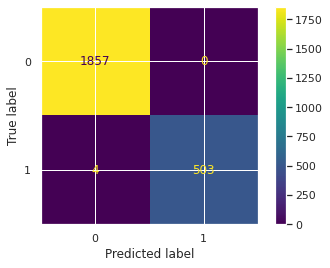

                                           
confusion matrix Decision Tree Test Set


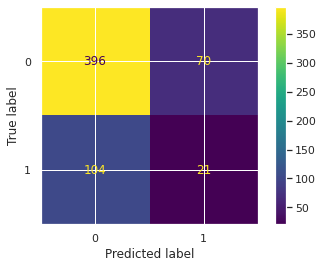

In [ ]:
# Confusion Matrix Decision Tree table with 4 different combinations of predicted value and actual value
print('confusion matrix Decision Tree Train Set')
dt = confusion_matrix(y_train,y_pred_train_DTC, labels=model_DT.classes_)
dispdt = ConfusionMatrixDisplay(confusion_matrix=dt,display_labels=model_DT.classes_)
dispdt.plot()
plt.show()
print('                                           ')
print('confusion matrix Decision Tree Test Set')
dt2 = confusion_matrix(y_test,y_pred_test_DTC, labels=model_DT.classes_)
dispdt2 = ConfusionMatrixDisplay(confusion_matrix=dt2,display_labels=model_DT.classes_)
dispdt2.plot()
plt.show()

In [ ]:
# classification model decision tree to predict opportunities that occur
print('classification report Decision Tree Train Set')
print(classification_report(y_train,y_pred_train_DTC))
print('                                  ')
print('classification report Decision Tree Test Set')
print(classification_report(y_test,y_pred_test_DTC))

classification report Decision Tree Train Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1857
           1       1.00      0.99      1.00       507

    accuracy                           1.00      2364
   macro avg       1.00      1.00      1.00      2364
weighted avg       1.00      1.00      1.00      2364

                                  
classification report Decision Tree Test Set
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       466
           1       0.23      0.17      0.19       125

    accuracy                           0.71       591
   macro avg       0.51      0.51      0.51       591
weighted avg       0.67      0.71      0.69       591



## 8d - Random Forest

In [ ]:
# Random Forest Model Accuracy Performance
y_pred_train_RFC = model_RF.predict(X_trainn)
y_pred_test_RFC = model_RF.predict(X_test)
print('accuracy score train : ',accuracy_score(y_train,y_pred_train_RFC))
print('accuracy score test : ',accuracy_score(y_test,y_pred_test_RFC))

accuracy score train :  0.9983079526226735
accuracy score test :  0.7715736040609137


confusion matrix Random Forest Train Set


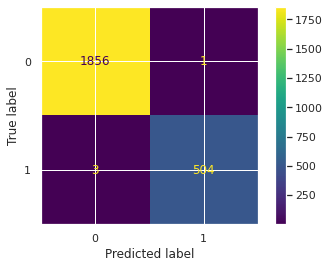

                                           
confusion matrix Random Forest Test Set


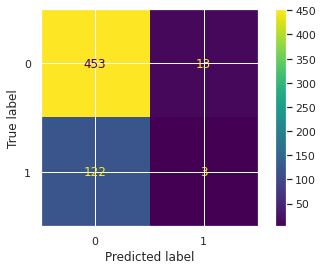

In [ ]:
# Confusion Matrix Random Forest table with 4 different combinations of predicted value and actual value
print('confusion matrix Random Forest Train Set')
rf = confusion_matrix(y_train,y_pred_train_RFC, labels=model_RF.classes_)
disprf = ConfusionMatrixDisplay(confusion_matrix=rf,display_labels=model_RF.classes_)
disprf.plot()
plt.show()
print('                                           ')
print('confusion matrix Random Forest Test Set')
rf2 = confusion_matrix(y_test,y_pred_test_RFC, labels=model_RF.classes_)
disprf2 = ConfusionMatrixDisplay(confusion_matrix=rf2,display_labels=model_RF.classes_)
disprf2.plot()
plt.show()

In [ ]:
# classification model random forest to predict opportunities that occur
print('classification report Random Forest Train Set')
print(classification_report(y_train,y_pred_train_RFC))
print('                                  ')
print('classification report Random Forest Test Set')
print(classification_report(y_test,y_pred_test_RFC))

classification report Random Forest Train Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1857
           1       1.00      0.99      1.00       507

    accuracy                           1.00      2364
   macro avg       1.00      1.00      1.00      2364
weighted avg       1.00      1.00      1.00      2364

                                  
classification report Random Forest Test Set
              precision    recall  f1-score   support

           0       0.79      0.97      0.87       466
           1       0.19      0.02      0.04       125

    accuracy                           0.77       591
   macro avg       0.49      0.50      0.46       591
weighted avg       0.66      0.77      0.70       591



## 8e - Model Evaluation K-Nearest Neighbor (KNN)

In [ ]:
# K-Nearest Neighbor Model Accuracy Performance
y_pred_train_KNN = model_KNN.predict(X_trainn)
y_pred_test_KNN = model_KNN.predict(X_test)
print('accuracy score train : ',accuracy_score(y_train,y_pred_train_KNN))
print('accuracy score test : ',accuracy_score(y_test,y_pred_test_KNN))

accuracy score train :  0.8519458544839256
accuracy score test :  0.7868020304568528


confusion matrix K-Nearest Neighbor Train Set


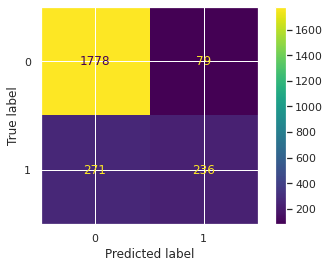

                                           
confusion matrix K-Nearest Neighbor Test Set


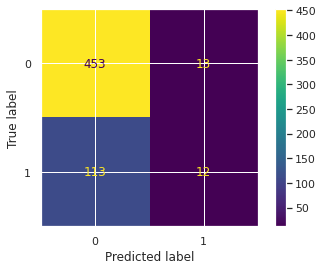

In [ ]:
# Confusion Matrix K-Nearest Neighbor table with 4 different combinations of predicted value and actual value
print('confusion matrix K-Nearest Neighbor Train Set')
knn = confusion_matrix(y_train,y_pred_train_KNN, labels=model_KNN.classes_)
dispknn = ConfusionMatrixDisplay(confusion_matrix=knn,display_labels=model_KNN.classes_)
dispknn.plot()
plt.show()
print('                                           ')
print('confusion matrix K-Nearest Neighbor Test Set')
knn2 = confusion_matrix(y_test,y_pred_test_KNN, labels=model_KNN.classes_)
dispknn2 = ConfusionMatrixDisplay(confusion_matrix=knn2,display_labels=model_KNN.classes_)
dispknn2.plot()
plt.show()

In [ ]:
# classification model K-Nearest Neighbor to predict opportunities that occur
print('classification report K-Nearest Neighbor Train Set')
print(classification_report(y_train,y_pred_train_KNN))
print('                                  ')
print('classification report K-Nearest Neighbor Test Set')
print(classification_report(y_test,y_pred_test_KNN))

classification report K-Nearest Neighbor Train Set
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1857
           1       0.75      0.47      0.57       507

    accuracy                           0.85      2364
   macro avg       0.81      0.71      0.74      2364
weighted avg       0.84      0.85      0.84      2364

                                  
classification report K-Nearest Neighbor Test Set
              precision    recall  f1-score   support

           0       0.80      0.97      0.88       466
           1       0.48      0.10      0.16       125

    accuracy                           0.79       591
   macro avg       0.64      0.53      0.52       591
weighted avg       0.73      0.79      0.73       591



## 8f - Model Evaluation Naive Bayes

In [ ]:
# Naive Bayes Model Accuracy Performance
y_pred_train_NB = model_NB.predict(X_trainn)
y_pred_test_NB = model_NB.predict(X_test)
print('accuracy score train : ',accuracy_score(y_train,y_pred_train_NB))
print('accuracy score test : ',accuracy_score(y_test,y_pred_test_NB))

accuracy score train :  0.8202199661590525
accuracy score test :  0.7901861252115059


confusion matrix Naive Bayes Train Set


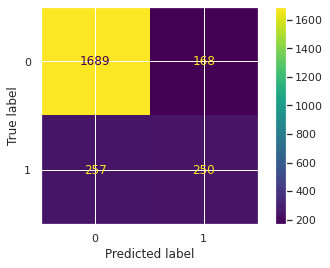

                                           
confusion matrix K-Nearest Neighbor Test Set


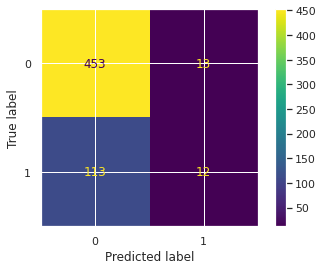

In [ ]:
# Confusion Matrix Naive Bayes table with 4 different combinations of predicted value and actual value
print('confusion matrix Naive Bayes Train Set')
nb = confusion_matrix(y_train,y_pred_train_NB, labels=model_NB.classes_)
dispnb = ConfusionMatrixDisplay(confusion_matrix=nb,display_labels=model_NB.classes_)
dispnb.plot()
plt.show()
print('                                           ')
print('confusion matrix K-Nearest Neighbor Test Set')
knn2 = confusion_matrix(y_test,y_pred_test_KNN, labels=model_KNN.classes_)
dispknn2 = ConfusionMatrixDisplay(confusion_matrix=knn2,display_labels=model_KNN.classes_)
dispknn2.plot()
plt.show()

In [ ]:
# classification model Naive Bayes to predict opportunities that occur
print('classification report Naive Bayes Train Set')
print(classification_report(y_train,y_pred_train_NB))
print('                                  ')
print('classification report Naive Bayes Test Set')
print(classification_report(y_test,y_pred_test_NB))

classification report Naive Bayes Train Set
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      1857
           1       0.60      0.49      0.54       507

    accuracy                           0.82      2364
   macro avg       0.73      0.70      0.71      2364
weighted avg       0.81      0.82      0.81      2364

                                  
classification report Naive Bayes Test Set
              precision    recall  f1-score   support

           0       0.79      1.00      0.88       466
           1       0.67      0.02      0.03       125

    accuracy                           0.79       591
   macro avg       0.73      0.51      0.46       591
weighted avg       0.76      0.79      0.70       591



## 89 - Model Evaluation AdaBoosting

In [ ]:
# AdaBoosting Model Accuracy Performance
y_pred_train_AdaBC = model_AdaBC.predict(X_trainn)
y_pred_test_AdaBC = model_AdaBC.predict(X_test)
print('accuracy score train : ',accuracy_score(y_train,y_pred_train_AdaBC))
print('accuracy score test : ',accuracy_score(y_test,y_pred_test_AdaBC))

accuracy score train :  0.9983079526226735
accuracy score test :  0.7123519458544839


confusion matrix AdaBoosting Train Set


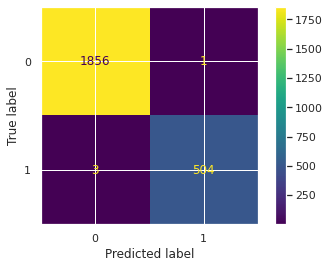

                                           
confusion matrix AdaBoosting Test Set


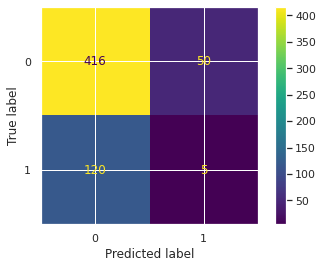

In [ ]:
# Confusion Matrix AdaBoosting table with 4 different combinations of predicted value and actual value
print('confusion matrix AdaBoosting Train Set')
ab = confusion_matrix(y_train,y_pred_train_AdaBC, labels=model_AdaBC.classes_)
dispnb = ConfusionMatrixDisplay(confusion_matrix=ab,display_labels=model_AdaBC.classes_)
dispnb.plot()
plt.show()
print('                                           ')
print('confusion matrix AdaBoosting Test Set')
ab2 = confusion_matrix(y_test,y_pred_test_AdaBC, labels=model_AdaBC.classes_)
dispab2 = ConfusionMatrixDisplay(confusion_matrix=ab2,display_labels=model_AdaBC.classes_)
dispab2.plot()
plt.show()

In [ ]:
# classification model AdaBoosting to predict opportunities that occur
print('classification report AdaBoosting Train Set')
print(classification_report(y_train,y_pred_train_AdaBC))
print('                                  ')
print('classification report AdaBoosting Test Set')
print(classification_report(y_test,y_pred_test_AdaBC))

classification report AdaBoosting Train Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1857
           1       1.00      0.99      1.00       507

    accuracy                           1.00      2364
   macro avg       1.00      1.00      1.00      2364
weighted avg       1.00      1.00      1.00      2364

                                  
classification report AdaBoosting Test Set
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       466
           1       0.09      0.04      0.06       125

    accuracy                           0.71       591
   macro avg       0.43      0.47      0.44       591
weighted avg       0.63      0.71      0.67       591



# 9 - Model Inference

## 9a - Loading Data Inference

In [ ]:
# Before the inference we first show the inference data at the beginning
datainfernce

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,30000,1,2,2,38,4,3,4,4,4,...,20601,19992,19392,3000,1000,786,0,0,0,1
1,230000,1,3,2,28,0,-1,-1,-1,-1,...,18844,34983,53935,65722,20000,18844,34983,408,14574,0
2,230000,2,1,2,27,0,0,0,0,-1,...,3234,4696,7062,5097,1060,1000,4696,7062,10898,0
3,80000,1,2,1,34,1,-2,-1,-1,-1,...,41300,0,0,0,862,41300,0,0,10000,0
4,420000,1,1,1,34,-1,0,0,0,-2,...,-16,-16,-16,3048,3016,0,0,0,3262,0
5,20000,1,2,1,24,0,0,0,0,0,...,12714,13059,13193,1500,1600,700,700,500,1000,1
6,360000,2,2,2,26,-1,-1,-1,-1,-2,...,0,0,0,463,2500,0,0,0,0,0
7,490000,1,1,1,41,0,0,0,0,0,...,102736,105083,107334,3600,4000,4000,4000,4000,4000,0
8,360000,1,2,1,40,0,0,0,-1,0,...,45895,27851,25408,10034,15011,45919,5036,5022,6010,0
9,150000,1,2,2,49,0,0,0,0,0,...,76333,77956,77553,2985,2700,5000,2823,2865,2679,1


In [ ]:
datainferncefin=datainfernce[['limit_balance','age','pay_0','pay_2','bill_amt_1']]
datainferncefin

,limit_balance,age,pay_0,pay_2,bill_amt_1
0,30000,38,4,3,17628
1,230000,28,0,-1,152966
2,230000,27,0,0,11406
3,80000,34,1,-2,0
4,420000,34,-1,0,18037
5,20000,24,0,0,10085
6,360000,26,-1,-1,1968
7,490000,41,0,0,95997
8,360000,40,0,0,69464
9,150000,49,0,0,151822


## 9b - Model Inference Logistic Regression

In [ ]:
# Predict using Linear Regression for data inference
y_pred_inf_log_reg = model_log_reg.predict(datainferncefin)
y_pred_inf_log_reg_fin = pd.DataFrame(y_pred_inf_log_reg, columns=['Pred-LOGREG-default_payment_next_month'])
y_pred_inf_log_reg_fin 

,Pred-LOGREG-default_payment_next_month
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [ ]:
# Predict using Best Estimator Linear Regression for data inference
y_pred_inf_log_gridsearchCV = model_log_gridsearchCV.predict(datainferncefin)
y_pred_inf_log_gridsearchCV_fin = pd.DataFrame(y_pred_inf_log_gridsearchCV, columns=['Pred-log-BestEstimator-default_payment_next_month'])
y_pred_inf_log_gridsearchCV_fin 

,Pred-log-BestEstimator-default_payment_next_month
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


## 9c - Model Inference SVM

In [ ]:
# Predict using SVM for data inference
y_pred_inf_svm = model_svm.predict(datainferncefin)
y_pred_inf_svm_fin = pd.DataFrame(y_pred_inf_svm, columns=['Pred-SVM-default_payment_next_month'])
y_pred_inf_svm_fin 

,Pred-SVM-default_payment_next_month
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [ ]:
# Predict using Best Estimator SVM for data inference
y_pred_inf_svm_gridsearchCV = model_svm_gridsearchCV.predict(datainferncefin)
y_pred_inf_svm__gridsearchCV_fin = pd.DataFrame(y_pred_inf_svm_gridsearchCV, columns=['Pred-SVM-BestEstimator-default_payment_next_month'])
y_pred_inf_svm__gridsearchCV_fin 

,Pred-SVM-BestEstimator-default_payment_next_month
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


## 9d - Model Inference Decision Tree

In [ ]:
# Predict using Decision Tree for data inference
y_pred_inf_DT = model_DT.predict(datainferncefin)
y_pred_inf_DTC_fin = pd.DataFrame(y_pred_inf_DT, columns=['Pred-DT-default_payment_next_month'])
y_pred_inf_DTC_fin 

,Pred-DT-default_payment_next_month
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


## 9e - Model Inference Random Forest

In [ ]:
# Predict using Random Forest for data inference
y_pred_inf_RF = model_RF.predict(datainferncefin)
y_pred_inf_RFC_fin = pd.DataFrame(y_pred_inf_RF, columns=['Pred-RF-default_payment_next_month'])
y_pred_inf_RFC_fin 

,Pred-RF-default_payment_next_month
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


## 9f - Model Inference KNN

In [ ]:
# Predict using KNN for data inference
y_pred_inf_KNN = model_KNN.predict(datainferncefin)
y_pred_inf_KNN_fin = pd.DataFrame(y_pred_inf_KNN, columns=['Pred-KNN-default_payment_next_month'])
y_pred_inf_KNN_fin 

,Pred-KNN-default_payment_next_month
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


## 9g - Model Inference Naive Bayes

In [ ]:
# Predict using Naive Bayes for data inference
y_pred_inf_NB = model_NB.predict(datainferncefin)
y_pred_inf_NB_fin = pd.DataFrame(y_pred_inf_NB, columns=['Pred-NB-default_payment_next_month'])
y_pred_inf_NB_fin 

,Pred-NB-default_payment_next_month
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


## 9h - Model Inference AdaBoosting

In [ ]:
# Predict using AdaBoosting for data inference
y_pred_inf_AdaBC = model_AdaBC.predict(datainferncefin)
y_pred_inf_AdaBC_fin = pd.DataFrame(y_pred_inf_AdaBC, columns=['Pred-AdaBC-default_payment_next_month'])
y_pred_inf_AdaBC_fin 

,Pred-AdaBC-default_payment_next_month
0,0
1,0
2,0
3,0
4,0
5,1
6,0
7,0
8,0
9,0


## 9i - Model Inference Algorithm

In [ ]:
# Merge/combine scaling/encoder data with its predicted rank
datainfernceF=datainfernce[['limit_balance','age','pay_0','pay_2','bill_amt_1']]
pd.concat([datainfernceF,y_pred_inf_log_reg_fin,y_pred_inf_log_gridsearchCV_fin,y_pred_inf_svm_fin,y_pred_inf_svm__gridsearchCV_fin,y_pred_inf_DTC_fin,y_pred_inf_RFC_fin,y_pred_inf_KNN_fin,y_pred_inf_NB_fin,y_pred_inf_AdaBC_fin], axis=1)

,limit_balance,age,pay_0,pay_2,bill_amt_1,Pred-LOGREG-default_payment_next_month,Pred-log-BestEstimator-default_payment_next_month,Pred-SVM-default_payment_next_month,Pred-SVM-BestEstimator-default_payment_next_month,Pred-DT-default_payment_next_month,Pred-RF-default_payment_next_month,Pred-KNN-default_payment_next_month,Pred-NB-default_payment_next_month,Pred-AdaBC-default_payment_next_month
0,30000,38,4,3,17628,0,0,0,0,0,0,0,0,0
1,230000,28,0,-1,152966,0,0,0,0,0,0,0,0,0
2,230000,27,0,0,11406,0,0,0,0,0,0,0,0,0
3,80000,34,1,-2,0,0,0,0,0,0,0,0,0,0
4,420000,34,-1,0,18037,0,0,0,0,0,0,0,0,0
5,20000,24,0,0,10085,0,0,0,0,0,0,0,0,1
6,360000,26,-1,-1,1968,0,0,0,0,0,0,0,0,0
7,490000,41,0,0,95997,0,0,0,0,0,0,0,0,0
8,360000,40,0,0,69464,0,0,0,0,0,0,0,0,0
9,150000,49,0,0,151822,0,0,0,0,0,0,0,0,0


Based on the prediction results of the inference data, all algorithms predicting the default payment are the same, except for the AdaBoosting algorithm which has slightly different results in predicting the inference data.

# 10 - Conclusion Drawing

> In this last section, it must contain conclusions that reflect the results obtained with the objectives that have been written in the introduction section.

Predict default payments. I have conducted an analysis of the relationship between default payments (target / y) with categorical data types, namely income 0 as no and 1 as yes, to variables (features / X) in the form of Limit_Balance, Age, Bills AMT_1, Repayment_0 and Repayment_2. In this case, an analytical approach is carried out using Logistic Regression, SVM, Decision Tree, Random Forest, K-Nearest Neighbor, Naive Bayes and AdaBoosting algorithms. After calculating the score cross validation, the best algorithm is obtained, namely SVM. Here are some conclusions that can be drawn:

---
> Exploratory Data Analysis (EDA)

The pie chart visualization shows the default payment history of using credit card services. Based on the visualization, it shows that customers who use credit cards are more dominant by 78.58% who do not make default payments from all expenses that customers have made, be it the use of consumption costs, health, fashion and other life support needs. Of the total cost consumption that has been done. Meanwhile, credit card users who only make default payments are 21.42%. When compared to the percentage of default payments that do not pay and make payments, the comparison is very different. This can be an evaluation for banks providing credit card services to be more selective in asking customers to pay the default according to what they have used. In order to avoid unwanted losses for bank companies providing credit card services.

---
> Evaluation Model SVM

The accuracy or accuracy of the svm model **without the best estimator has a training value of 83.50% and a testing value of 78.84%**, meaning that it is still categorized as goodfit, because the range of values ​​is not much different. While K**the accuracy or accuracy of the SVM model uses the best estimator C=1, coef0=0, degree=2, gamma=0.1, kernel=poly has a training value of 83.41% and testing of 78.84%**, meaning that it is still categorized as goodfit , where this svm model will be able to predict default payments. **Based on the difference in the accuracy of the model without the best estimator and the accuracy of the model using the best estimator, there is no significant difference, in fact the accuracy model has almost the same value**. Indicates that without finding the best estimator, the model is quite good at predicting the default payout target.

**Y_train, Precision 0 of the comparison of default payments for customers who do not pay is true with the number of data that is predicted to be positive or suspected to be true not paying by 84%. Precision 1 of the comparison of default payments from customers who pay/repay is indeed correct with the amount of data that is predicted to be positive or suspected to be correct by 74%**. This can be considered by credit card service providers to see the customer's reputation in repaying debt, interest or other principal loans. If a customer fails to pay, the credit card service provider can limit the balance for further borrowing in the future. For customers who are on time in making payments, creditors can consider adding appreciation with no limit on credit card balance restrictions.

**Y_train, Recall 0 from the comparison of companies not accepting default payments that have been used by customers, should be his property as a credit card service provider, it is true with a lot of data that is predicted to be negative or is suspected to be true not receiving a profit of 0.97%. Recall 1 from the comparison of credit card service providers obtaining ownership rights/profits from customers who make default payments is indeed true with a large number of data that is predicted to be negative or allegedly correct at 35%**. This can be a consideration for credit card service providers to be more selective in monitoring customers who have not paid or more pressing customers to immediately make default payments, so that companies can get the benefits that are theirs. Companies must also control customer usage limits based on their economic history, so that customers can still repay the company's profit rights.

The y_train classification model has **83% accuracy**.

# Conceptual Problems

> 1. What is the criterion parameter function in the Decision Tree? Explain one criterion that you understand!

Answer: Deciion tree as I know is a branching method from several choices in the data. Targets and features are in the form of nominal classifications. There are several types of decision tree parameters in determining, one of which I know is maximal_deptt.
Maximal_depth itself is a set of decision tree parameters, where this parameter is used to limit the depth of the decision tree. If the value is set to '0', the maximum depth parameter does not constrain tree branches until the termination criteria are met. If the value is set to '0', a tree will stop until zero conclusions are generated.


> 2. What is the function of pruning in the Tree model?

Answer: Purning in the tree model is used with tree pruning, which identifies and removes unnecessary branches from the established tree. So that information that has no impact can be deleted or not displayed.

> 3. How to choose the optimal K in KNN?

Answer: The value of the number of k used states the number of nearest neighbors involved in determining the class prediction on the data to be analyzed. For the optimal k selection, it can be seen from the selected closest neighbors, for example between the closest neighbors from the outermost data there are several choices, then class voting is carried out from the k closest neighbors. The class with the highest number of neighbors is then given as a class label for the prediction results in the analysis data.


> 4. Explain what you know about Cross Validation!

Answer: Cross-validation (CV), which I know is a statistical method that can be used to evaluate the performance of a model or algorithm, to see how well the model works in calculating the algorithm against the data being analyzed.

> 5. Explain what you know about Accuracy, Precision, Recall, F1 Score!

Answer: Accuracy is the ratio of Correct predictions (positive and negative) to the overall data. Precision is the ratio of positive correct predictions compared to the overall positive predicted results or answers how true the prediction results are. Recall is the ratio of true positive predictions compared to the overall data that are true positive or answer how true the actual truth results are. F1 Score is a weighted comparison of the average precision and recall.